## Analyzing factors affecting vehicle prices on Crankshaft List

<span style="color:blue">**Project description:**</span> In this project, we are an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on our company site every day. We need to study data
collected over the last few years and determine which factors influence the price of a vehicle.

<span style="color:blue">**Organization of the report:**</span> The report is divded into 5 sections:

- In Step 1, we study the general information of the vehicle dataset.
- In Step 2, we assess the quality of the raw data, build a data preprocessing strategy and implement the latter.
- In Step 3, we add to the dataset table new columns with useful information we compute from the existing columns.
- In Step 4, we carry out exploratory data analysis. In particular, we explore the following aspects.
    1. We study histograms of the price, age of the vehicle when the ads were placed, mileage, number of cylinders, and vehicle condition data from the ads. We identify outliers and remove them. 
    2. We identify the typical lifetime of an ad on the site.
    3. We discover the most popular types of vehicles on the site. 
    4. For the two most popular type of vehicles, we identify study factors that influence the price.   
- In Step 5, we close the report with final conclusions. 

<span style="color:blue">**Importing libraries:**</span> We close the introduction by importing all code libraries and output style functions we will be using in our work. 

In [1]:
# Import libraries and define output style functions.

# Import the pandas library 
#      (url-> https://pandas.pydata.org/).
import pandas as pd

# Import the numpy library 
#      (url-> https://pandas.pydata.org/).
import numpy as np

# Import pyplot module from matplotlib 
#      (url-> https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html).
import matplotlib.pyplot as plt

# Import Markdown and display modules from IPython.display library 
#      (url -> https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html).
from IPython.display import Markdown, display
# Define printmd() function to print code in blue color.
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))


### Step 1. General information about the dataset

We are handed the information that the dataset contains the following fields:

- <span style="color:blue">**price:**</span>  
- <span style="color:blue">**model_year:**</span>  
- <span style="color:blue">**model:**</span>  
- <span style="color:blue">**condition:**</span>  
- <span style="color:blue">**cylinders:**</span>  
- <span style="color:blue">**fuel:**</span> gas, diesel, etc.
- <span style="color:blue">**odometer:**</span> the vehicle's mileage when the ad was published
- <span style="color:blue">**transmission
:**</span> 
- <span style="color:blue">**paint_color:**</span> 
- <span style="color:blue">**is_4wd:**</span> whether the vehicle has 4-wheel drive (Boolean type)
- <span style="color:blue">**date_posted:**</span> the date the ad was published
- <span style="color:blue">**days_listed:**</span> from publication to removal


Let us open the data file and explore the format in which information is stored.

In [2]:
# Read comma-separated values (csv) file into a pandas DataFrame object using pandas.read_csv() method.
# Use try...except to make sure the project runs both on local machine and platform
try:
    data = pd.read_csv('vehicles_us.csv') # path on local machine
except:
    data = pd.read_csv('/datasets/vehicles_us.csv') # path on Practicum100 platform

# Print a concise summary of a DataFrame with pandas.DataFrame.info() method.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


From the information provided, we see that we have $51525$ entries with $13$ columns. The column names match the ones described by the company, but there is an additional 'type' column in the dataset that was forgotten in the description. Among these columns, we have
- $2$ columns of dtype 'int64': 'price' and 'days_listed',
- $4$ columns of dtype 'float64': 'model_year', 'cylinders', 'odometer', 'is_4wd'
- $7$ columns of dtype 'object' : 'model', 'condition', 'fuel', 'transmission', 'type', 'paint_color', 'date_posted'.

We also note that several columns return missing values. These are:
- 'model_year': About $7\%$ of data is missing (3619 entries).
- 'cylinders': About $10\%$ of data is missing (5260 entries).
- 'odometer': About $15%$ of data is missing (7892 entries).
- 'paint_color': About $18\%$ of data is missing (9267 entries).
- 'is_4wd': About $50\%$ of data is missing (25953 entries).

Thus, we have quite an amount of missing data in some of the columns.

Finally, we read that the data uses about $5.1$ MB of memory space. Since we work with a relatively small dataset, we do not worry about memory space during this project.

To get a first impression on the content populating the dataset, let us display few of its entries.

In [3]:
# Display rows of the DataFrame using the display() method.

# Call pandas.DataFrame.head(n=5) to get the first five rows of a DataFrame.
display(data.head())

# Call pandas.DataFrame.sample(n=None) to get randomly sampled five rows from a DataFrame.
display(data.sample(5))

# Call pandas.DataFrame.tail(n=5) to get the last five rows of the DataFrame.
display(data.tail())


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
19645,15995,NaN,gmc sierra 1500,excellent,NaN,gas,118840.0,automatic,truck,black,1.0,2018-10-21,44
29706,32000,2017.0,ford f-250 super duty,excellent,8.0,gas,26000.0,automatic,pickup,white,1.0,2018-08-14,87
3924,7900,2010.0,toyota rav4,good,6.0,gas,NaN,automatic,SUV,NaN,NaN,2018-07-08,36
1049,4295,NaN,ford focus,excellent,4.0,gas,97824.0,automatic,sedan,white,NaN,2018-12-23,45
19502,3000,2006.0,honda accord,excellent,NaN,gas,210356.0,automatic,sedan,NaN,NaN,2018-08-13,59


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


From the displayed tables, we make the following observations:
- It seems like the missing NaN values in the 'model_year' column is the reason why the data is stored as type 'float64' in this column. 
- Similarly the missing values seem to be the reason why the 'is_4wd' column, where data is supposed to be Boolean or integer, is of type 'float64'. 
- Although it is clear that the dates in the 'date_posted' column read as'year-month-day', the data is actually stored as 'string' type objects, which won't be convenient to work with as dates.

<span style="color:blue">**duplicates:**</span> 

Let us check if raw data have duplicate entries.   

In [4]:
# Identify duplicated entries in DataFrame using pandas.DataFrame.duplicated() method.
duplicated_entries = data.loc[data.duplicated() == True]
# The assignment returns a new DataFrame (copy by value), 
#         as df.loc[mask] returns a new DataFrame with a copy of the data.

# Print the number of duplicated entries.
print('The number of duplicates in raw data is: ', duplicated_entries.shape[0])
# Print the number of customer whose 'debt' field equals 1 among the duplicated entries.


The number of duplicates in raw data is:  0


We found out that there are no duplicated rows in the dataset. Thus, all observed ads in our dataset are unique.

**Concluding remarks:** In this step, we loaded the dataset into our workspace and obtained some general information about its format and content. In particular, we identified data types and missing values stored as NaN (not a number) format. We found out that few columns contain between $7\%$ up to $50\%$ of null values, which we should study in the data preprocessing stage. We also found out that some float to integer conversion might be possible in these columns once the missing values are filled. We also spotted a more important issue related to the data types: we cannot work with the dates the ads were publish using raw data since the values are stored as string objects. This calls for a convertion of this column to datetime objects. Finally, we checked for duplicates in raw data and found none. 

Since we only checked few entries of our dataset, we still have at this point a limited understanding about the quality of the raw data. To get a better understanding, the next section will take a closer look at the data in each column of the dataset.

### Step 2. Data Preprocessing

In this section, we study missing data and replace data types when appropriate. We will first build our data preprocessing strategy. We will implement the changes afterwards.  

#### Step 2 - a. Data Preprocessing Strategy

In Step 1, we already identified that $5$ of the columns have missing values. We also know the data type for each column. Here, let us try to look at the content of the data populating each column and the summary statistics. We will check if there are missing values that may not have been stored as NaN. Whenever a column has missing values, we will discuss whether or not, and if so how to fill/replace those values. We will also describe the factors that may have lead to missing values. Similarly, when we come across columns whose data can be, or should be, converted to another type, we will point this out.

<span style="color:blue">**price:**</span> 

In [5]:
# Display summary statistics and value counts for 'price' column
display(data['price'].describe().to_frame(name = 'price stats'))
display(data['price'].value_counts().to_frame(name = 'price counts'))


,price stats
count,51525.000000
mean,12132.464920
std,10040.803015
min,1.000000
25%,5000.000000
50%,9000.000000
75%,16839.000000
max,375000.000000


,price counts
1,798
6995,719
5995,655
4995,624
3500,620
...,...
49988,1
36600,1
300000,1
39873,1


- This column contains quantitative data about the prices advertised for the vehicles. The data is stored as integers of type 'int64'. As a result, the price is assumed to take discrete values, which we find reasonable for the context.
- The integer values fall in the range $[1, 375000]$. As there could be big price gaps between different vehicles, this column likely contains some outliers. In addition, a price tag of $1$ do seem far fetched. However, we leave the discussion to Step 4.
- Let us also note that there were as many as $3443$ different price tags for the vehicles.

<span style="color:blue">**model_year:**</span> 

In [6]:
# Display summary statistics and value counts for 'model_year' column
display(data['model_year'].describe().to_frame(name = 'model_year stats'))
display(data['model_year'].value_counts().sort_index().to_frame(name = 'model_year counts'))

# Check if all of the non-missing values in the column are indeed integers.
# pandas.Series.all() returns whether all elements are True or not
if data.loc[~data['model_year'].isnull(), 'model_year'].apply(float.is_integer).all():
    print('Non-null data in "model_years" column consist integers as expected')


,model_year stats
count,47906.000000
mean,2009.750470
std,6.282065
min,1908.000000
25%,2006.000000
50%,2011.000000
75%,2014.000000
max,2019.000000


,model_year counts
1908.0,2
1929.0,1
1936.0,1
1948.0,1
1949.0,1
...,...
2015.0,3323
2016.0,2954
2017.0,2419
2018.0,2193


Non-null data in "model_years" column consist integers as expected


Let us also visualize the 'model_year' counts.

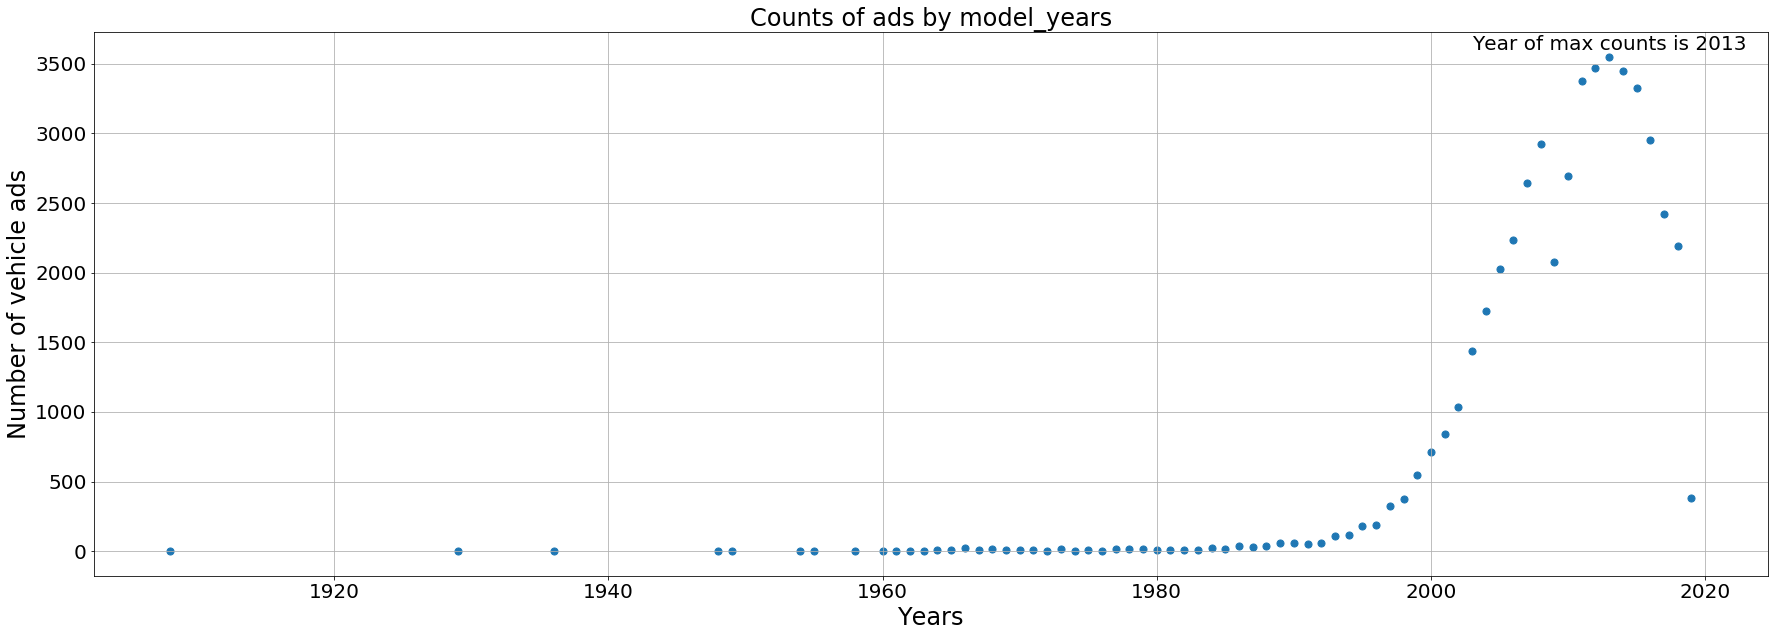

In [7]:
# Compute ad counts for each model year
MY_counts = data['model_year'].value_counts().sort_index()

# Plot the number of ads by model year
plt.figure(figsize=(30, 10))
plt.scatter(MY_counts.index, MY_counts, s=50)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.title("Counts of ads by model_years", fontsize= 24)
plt.xlabel("Years", fontsize= 24)
plt.ylabel("Number of vehicle ads", fontsize= 24)
plt.grid(b=True)
# Annotate the year of maximum count on the plote
max_index = int(MY_counts.idxmax()) # get the index of the maximum count
year = max_index
value = MY_counts[max_index]
plt.annotate('Year of max counts is {}'.format(int(year)), xy=(year-10, value+50), fontsize=20)
plt.show()


- This column contains quantitative data about the year the vehicle was produced. 
- Although we know from Step 1 that the data is stored as floating point numbers, we see that after the NaN values are filtered out, only integer numbers populate this column (as it should be for year data). To convert the data type, we would thus need to eliminate the NaN values in some way.
- The range of data in this column indicates that the ads included vehicle models between $1908$ and $2019$. However, we can see from the plot that there were very few ads of vehicles produced prior to the $60$s. We also observe that the number of ads on the site is increasing steeply for vehicles of model years $2000$ and onwards until $2013$, except a drop in $2009$, and that the trend is reversed after $2013$. The reverse in trend could be an indication that many people use their vehicles for $5$ to $7$ years after purchase. 

❗<span style="color:red">**Missing values spotted:**</span> 
Let us decide whether we would like to fill the NaN values in this column, and if so how to chose the replacement values. The model year information is missing, probably because the owner of the ad does not know it (assuming there is no reason to hide this information). But, this is not much enlightening. It looks like we need to do some googling to gather domain specific knowledge about how normally such information is passed on to different parties and when it can be lost. 

Quoting from wikipedia: "The standardized format of the vehicle identification number (VIN) used in the United States and Canada includes the model year of the vehicle as the 10th digit. The actual date that the vehicle was produced is not part of the VIN, but it is required to be shown on vehicle safety certification label". "In other countries, it is more common to identify specific vehicles by their year and month of production, and cars of a particular type by their generation". "In Europe, the lesser use of model years as a descriptor is partly because since the 1980s many vehicles are introduced at the Geneva Motor Show in March, the Frankfurt Motor Show in September or the Paris Motor Show in September". "As with the rest of Europe, the motor industry in the United Kingdom did not regularly make use of model years in the way common in the USA, since cars were not as regularly updated or altered".
See, https://en.wikipedia.org/wiki/Model_year#Other_countries

In addition, the support pages of a commercial web-based service called CARFAX that supplies vehicle history reports to individuals and businesses on used cars and light trucks for the American and Canadian consumers provides the  following reasons why the model year might be missing in their reports: "(1) The VIN is invalid. Please verify the VIN is correct with the VIN displaying on the vehicle's dashboard or driver's side door jamb. (2) The vehicle was not originally built for the North American market (also known as a ""gray market"" vehicle) and was imported as a used vehicle. (3) It is a specialty, low-production vehicle which never had its VIN decode information registered with CARFAX. (4) It is a new model year vehicle which has not had its VIN information reported to CARFAX yet."
See, https://support.carfax.com/article/year-make-and-model-missing-on-carfax-report/

To summarize, the data in this column might be missing because the vehicle wasn't built for the North American market. It could be also missing because the owner of the ad did not have the correct VIN or because no document in her/his possession (such as registration, insurance, vehicle history report) contains the model year or VIN.

Now that we have discussed some factors that may have resulted in missing year model information, let us see if it makes sense for us to try to fill the missing data. Recall that about $7\%$ of the data is missing. So, missing values are worth to investigate. 

In the context of this column using the summary statistics generated from all the entries to fill missing data would not make sense. The model year of the vehicle depends at least on the model. So, let us first look at the summary statistics of the per model missing model years data. 

In [8]:
# Filter out rows where 'model_year' is NaN from raw data and store separately
data_MY = data.loc[~data['model_year'].isnull()].copy()
# Store rows where 'model_year' is NaN separately
data_MY_NaN = data.loc[(data['model_year'].isnull())].copy()

# Create a pivot table showing the per model number of ads for all model years
pivot_MY_L1 = pd.pivot_table(index=['model']
                          , columns='model_year' , aggfunc='size', data=data_MY)
# Create a pivot table showing the per model number of ads with missing model year data
pivot_MY_L1_NaN = pd.pivot_table(index=['model']
                           , aggfunc='size', data=data_MY_NaN)

# Add the second pivot table's counts of missing values to the first one as a new column
pivot_MY_L1['missing_counts'] = pivot_MY_L1_NaN
# Drop rows where there are no missing counts
pivot_MY_L1.dropna(subset=['missing_counts'], inplace=True)

# Compute percentages in each row
pivot_MY_L1_prob = pivot_MY_L1.div(pivot_MY_L1.sum(axis=1), axis=0).multiply(100).round(2)
# Rename column
pivot_MY_L1_prob.rename(columns={'missing_counts': 'missing_counts_%'}, inplace=True)
# Display summary statistics for the missing count percentages
display(pivot_MY_L1_prob['missing_counts_%'].describe())


count    100.000000
mean       7.155000
std        1.598911
min        4.200000
25%        6.260000
50%        7.090000
75%        7.862500
max       17.070000
Name: missing_counts_%, dtype: float64

We identified that between $4\%$ to $17\%$ of the model year data is missing for any vehicle model. Recall that we had identified that in total about $7\%$ of the data is missing. Both the per model mean and median are also around $7\%$. Thus, only few models can be treated as outliers for their missing model year data. Therefore, it is reasonable to assume that the model year data is missing rather at random in the ads for each model. Let us also visualize the total number and the number of missing and non-missing data points for each model as follows.

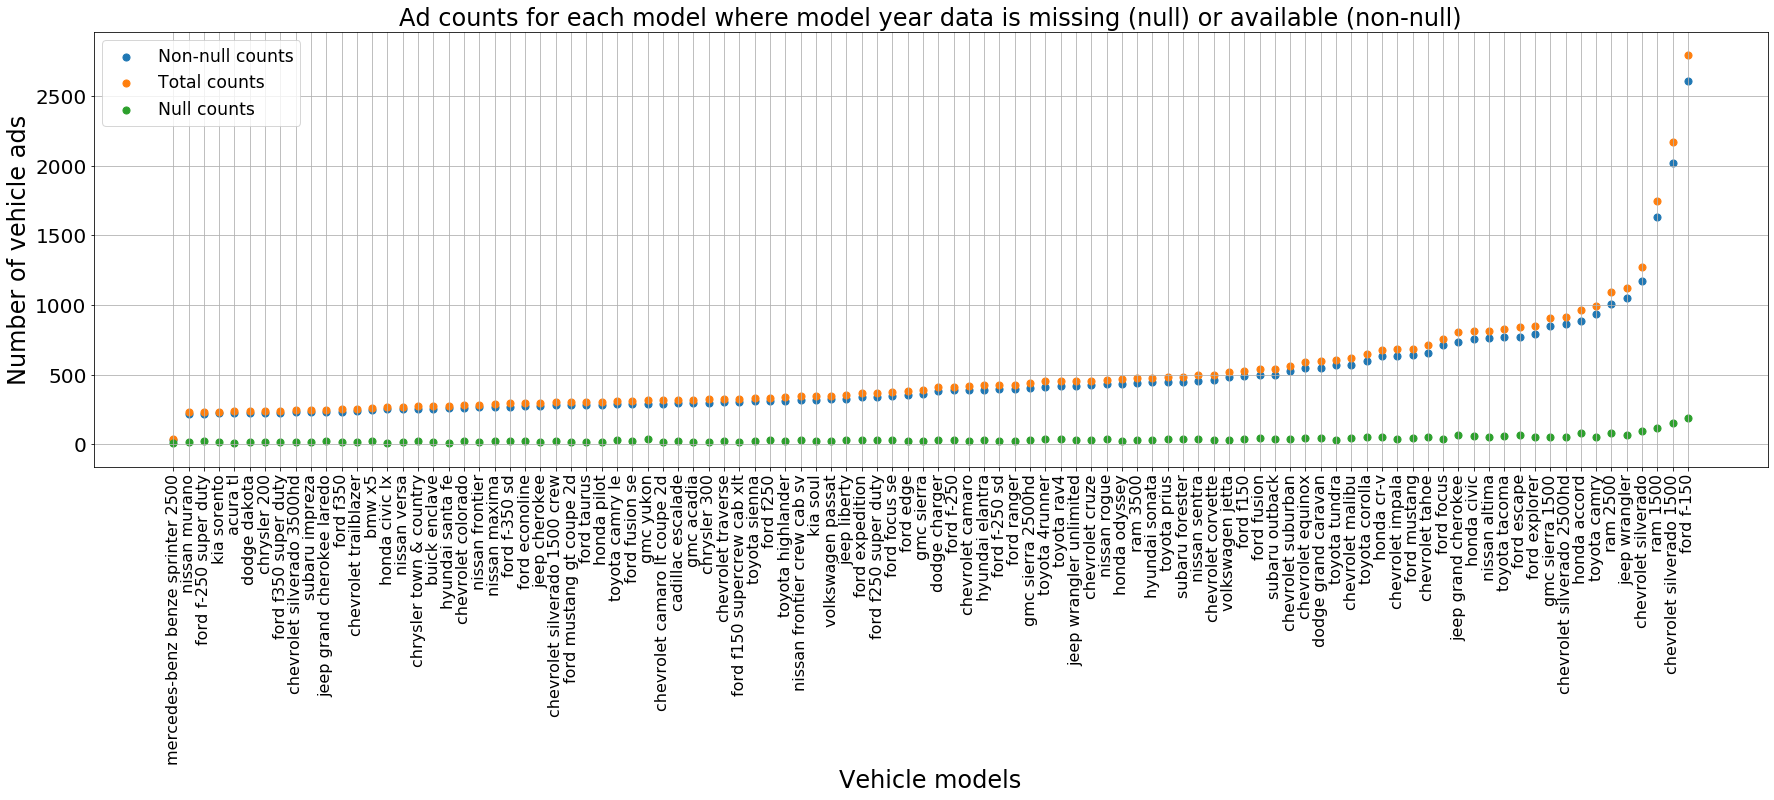

In [9]:
# Count the total number of ads per vehicle model
M_MY_sum = pivot_MY_L1.transpose().sum().sort_values()

# Count the number of non-null values in the 'model_year' column for respective models
M_MY_counts = pivot_MY_L1.drop('missing_counts', axis=1).transpose().sum().sort_values()

# Create graphs showing the total, non-null, and null counts of 'model_year' column for respective models
plt.figure(figsize=(30, 8))
plt.scatter(M_MY_counts.index, M_MY_counts, s=50, label='Non-null counts')
plt.scatter(M_MY_counts.index, M_MY_sum, s=50, label='Total counts')
plt.scatter(M_MY_counts.index, pivot_MY_L1_NaN.loc[M_MY_counts.index], s=50, label='Null counts')
plt.xticks(fontsize= 16, rotation=90)
plt.yticks(fontsize= 20)
plt.title('Ad counts for each model where model year data is missing (null) or available (non-null)', fontsize= 24)
plt.xlabel("Vehicle models", fontsize= 24)
plt.ylabel("Number of vehicle ads", fontsize= 24)
plt.grid(b=True)
plt.legend(loc='upper left', fontsize='xx-large')
plt.grid(b=True)
# Display the plot
plt.show()


Based on our findings, one idea would be to fill the missing model years with the mode of the non-missing data for the respective vehicle models. Let us take a particular model and study what would be the implications of this idea. 

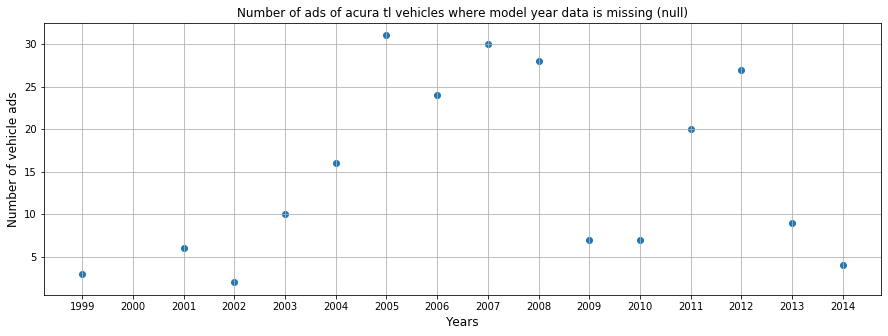

In [10]:
# Retrieve first model from the pivot table
first_model_MY = pivot_MY_L1.drop('missing_counts', axis=1).head(1).transpose()

# Display the scatter plot for the retrieved model's non-null counts by observed model years. 
plt.figure(figsize=(15, 5))
plt.scatter(first_model_MY.index, first_model_MY)
start = int(first_model_MY.first_valid_index())
stop = int(first_model_MY.last_valid_index())
plt.xticks(ticks=range(start, stop+1, 1), fontsize= 10)
plt.yticks(fontsize= 10)
plt.title('Number of ads of {} vehicles where model year data is missing (null)'.format(pivot_MY_L1.index[0]), fontsize= 12)
plt.xlabel("Years", fontsize= 12)
plt.ylabel("Number of vehicle ads", fontsize= 12)
plt.grid(b=True)
plt.show()


From the above plot, we see that with slightly more than $30$ ads, the mode of the 'model_year' column is $2005$ for the 'acura tl' model. On the other hand, there are several other model years that were advertised more than $20$ times and even close to $30$ times. We anticipate that such a phenomenon would also arise from the data for multiple other vehicle models. We thus think that using the mode per vehicle model is not ideal and might lead to statistical disadvantages. 

Let us ask ourselves the likelihood of any 'acura_tl' vehicle on the market to have a given year for its model year. Wikipedia reports the range $1996-2014$ for the model years of 'acura_tl' models, see https://en.wikipedia.org/wiki/Acura_TL. So, all we can tell from Wikipedia is that the likelihood is zero outside that range. We could perhaps even eliminate some of the model years based on other properties of the models, i.e., automatic, diesel, etc. Ideally, if we had access to the company's sales data, we could use that to determine the distribution of the model years of the 'acura_tl' vehicles on the market, and sample the missing data from that distribution. But we do not have access to such information. Instead, we can use the available data in our dataset to sample the model year. The dataset contains 'acura tl' vehicle ads for $15$ different years from $1999-2014$. Two options come to our minde. We can sample the model year from the uniform distribution over the observed $15$ options, based on the assumption that each observed year is equally likely to happen. Or, we can sample the model year from the relative frequency distribution, based on the assumption that our dataset is a good representation of the true population. 

Let us go for the second option. But, then why not include other vehicle properties into the analysis? The model year of a vehicle might also depend on its type, transmission system, fuel source, or even the number of cylinders in its engine. Since the latter data column has a lot of missing values, we suggest to rely on the other stated features without missing values and sample from the grouped data. One more remark, we need to check that the sampled years are prior to the dates the ads were posted.

In [11]:
# Create a pivot table showing the per model/type/transmission/fuel number of ads for the cylinder categories
pivot_MY_L4 = pd.pivot_table(index=['model','type', 'transmission', 'fuel']
                          , columns='cylinders' , aggfunc='size', data=data_MY)
# Create a pivot table showing the per model/type/transmission/fuel missing number of ads for 'cylinders' data
pivot_MY_L4_NaN = pd.pivot_table(index=['model','type', 'transmission', 'fuel']
                           , aggfunc='size', data=data_MY_NaN)
# Print the number of common rows in the pivot tables
print("Non-null data in the 'model_year' column have {} groups".format(len(pivot_MY_L4)))
print("Null data in the 'model_year' column have {} groups".format(len(pivot_MY_L4_NaN)))
print("Number of overlapping groups in null and non-null 'model_year' data:",
    len(pivot_MY_L4.merge(pivot_MY_L4_NaN.to_frame(), how = 'inner', left_index=True, right_index=True)))


Non-null data in the 'model_year' column have 878 groups
Null data in the 'model_year' column have 384 groups
Number of overlapping groups in null and non-null 'model_year' data: 356


It looks like with our grouping strategy, there would be $28$ missing values we won't be able to fill. We suggest to fill these remaining missing values with the mode for the respective models. 

<span style="color:blue">**model:**</span> 

In [12]:
# Display summary statistics and value counts for 'model' column
display(data['model'].describe().to_frame(name = 'model stats'))
display(data['model'].value_counts().to_frame(name = 'model counts'))

# Check whether all characters in each string data are lowercase calling pandas.Series.str.islower()
if data['model'].str.islower().all():
    print('All strings in "model" column consists of lowercase letters')


,model stats
count,51525
unique,100
top,ford f-150
freq,2796


,model counts
ford f-150,2796
chevrolet silverado 1500,2171
ram 1500,1750
chevrolet silverado,1271
jeep wrangler,1119
...,...
ford f-250 super duty,241
kia sorento,236
acura tl,236
nissan murano,235


All strings in "model" column consists of lowercase letters


- This column contains categorical data identifying the model of the vehicle. Data is stored as 'string' objects. 
- Although we verified that all model names were stored in lower case letters, we can see that some of the vehicles might have been advertised under slightly different names. Take for instance 'chevrolet silverado' and 'chevrolet silverado 1500'. Thus, all we can conclude at this point is that there are at most 100 different vehicle models that were advertised in the site. 
- We can also tell that ford and chevrolet vehicles quite dominate the site. This could be an indication of these models being quite populat in the US market. 

<span style="color:blue">**condition:**</span> 

In [13]:
# Display summary statistics and value counts for 'condition' column
display(data['condition'].describe().to_frame(name = 'condition stats'))
display(data['condition'].value_counts().to_frame(name = 'condition counts'))


,condition stats
count,51525
unique,6
top,excellent
freq,24773


,condition counts
excellent,24773
good,20145
like new,4742
fair,1607
new,143
salvage,115


- This column reports categorical data on the condition of the advertised vehicles.
- The following objects of type 'string' are observed throughout the column: 'excellent', 'good', 'like new', 'fair', 'new', and 'salvage'. In almost half of the ads, the vehicles were advertised as 'excellent' in their conditions.  

<span style="color:blue">**cylinders:**</span> 

In [14]:
# Display summary statistics and value counts for 'cylinders' column
display(data['cylinders'].describe().to_frame(name = 'cylinders stats'))
display(data['cylinders'].value_counts().to_frame(name = 'cylinders counts'))

# Check if all of the non-missing values in the column are indeed integers.
# pandas.Series.all() returns whether all elements are True or not
if data.loc[~data['cylinders'].isnull(), 'cylinders'].apply(float.is_integer).all():
    print('Non-null data in "cylinders" column consist of integers as expected')


,cylinders stats
count,46265.000000
mean,6.125235
std,1.660360
min,3.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,12.000000


,cylinders counts
8.0,15844
6.0,15700
4.0,13864
10.0,549
5.0,272
3.0,34
12.0,2


Non-null data in "cylinders" column consist of integers as expected


- This column contains categorical data which indicate with how many engine cylinders the vehicles are powered.
-  Although we know from Step 1 that the data is stored as floating point numbers, we see that after the NaN values are filtered out, only integer numbers populate this column (as it should be). To convert the data type, we would thus need to eliminate the NaN values in some way.
- We see that advertised vehicles have either $3$, $4$, $5$, $6$, $8$, $10$ or $12$ cylinders. Thus, the ads generated $7$ categories in this column. Note that $3$ to $12$ is indeed the typical range of the number of cylinders an engine has. However, googling on the web, some sources say that vehicles' engines can have as many as $16$ and as few as $2$ cylinders. In our dataset, vehicles with $4$, $6$, and $8$ cylinders were advertised most frequently, each appearing almost in $30\%$ of the ads. We believe this is in line with the standard choices in the vehicle industry.

❗<span style="color:red">**Missing values spotted:**</span> Recall that $10\%$ of data in this column is missing. The number of cylinders a vehicle has is a rather technical information. It is possible that the owner never needed or got curious about this information. Let us decide whether there is an appropriate way to fill the NaN values of this column. Similar to the 'model_year' column, it wouldn't be appropriate to use summary statistics generated from all the entries to fill this column. The possible number of cylinders are usually limited for each vehicle model. So, let us start by looking at the per model grouped missing data to see if the missing entries follow any pattern.

In [15]:
# Filter out rows where 'cylinders' is NaN from raw data and store separately
data_CY = data.loc[~data['cylinders'].isnull()].copy()
# Store rows where 'cylinders' is NaN separately
data_CY_NaN = data.loc[(data['cylinders'].isnull())].copy()

# Create a pivot table showing the per model number of ads for the cylinder categories
pivot_CY_L1 = pd.pivot_table(index=['model']
                          , columns='cylinders' , aggfunc='size', data=data_CY)
# Create a pivot table showing the per model number of ads with missing 'cylinders' data
pivot_CY_L1_NaN = pd.pivot_table(index=['model']
                           , aggfunc='size', data=data_CY_NaN)

# Add the second pivot table's counts of missing values to the first one as a new column
pivot_CY_L1['missing_counts'] = pivot_CY_L1_NaN
# Drop rows where there are no missing counts
pivot_CY_L1.dropna(subset=['missing_counts'], inplace=True)
# Compute percentages in each row
pivot_CY_L1_prob = pivot_CY_L1.div(pivot_CY_L1.sum(axis=1), axis=0).multiply(100).round(2)
# Rename column
pivot_CY_L1_prob.rename(columns={'missing_counts': 'missing_counts_%'}, inplace=True)
# Display summary statistics for the missing count percentages
display(pivot_CY_L1_prob['missing_counts_%'].describe())


count    100.000000
mean      10.176200
std        1.632344
min        5.990000
25%        9.290000
50%       10.205000
75%       10.897500
max       17.070000
Name: missing_counts_%, dtype: float64

As in the case of the 'model_year' column, it is reasonable to assume from the computed summary statistics that data in this column is missing rather at random in the ads for each model. However, as opposed to the 'model_year' column, the range of values this column can take is much smaller for most of the models. Moreover, we expect many models to have even fewer than $7$ options for their possible number of cylinders. Let us further group data according to additional vehicle properties and display the resulting pivot tables to see if our belief is tangible.

In [16]:
# Create a pivot table showing the per model/type/transmission/fuel number of ads for the cylinder categories
pivot_CY_L4 = pd.pivot_table(index=['model','type', 'transmission', 'fuel']
                          , columns='cylinders' , aggfunc='size', data=data_CY)
# Create a pivot table showing the per model/type/transmission/fuel missing number of ads for 'cylinders' data
pivot_CY_L4_NaN = pd.pivot_table(index=['model','type', 'transmission', 'fuel']
                           , aggfunc='size', data=data_CY_NaN)

# Add the second pivot table's counts of missing values to the first one as a new column
pivot_CY_L4['missing_counts'] = pivot_CY_L4_NaN
# Drop rows where there are no missing counts
pivot_CY_L4.dropna(subset=['missing_counts'], inplace=True)

# Display the first pivot table
display(pivot_CY_L4)


cylinders                                    3.0    4.0   5.0    6.0   8.0  \
model             type  transmission fuel                                    
acura tl          SUV   automatic    gas     NaN    NaN   NaN    2.0   NaN   
                  other automatic    gas     NaN    NaN   NaN    1.0   NaN   
                  sedan automatic    gas     NaN    3.0   NaN  197.0   NaN   
bmw x5            SUV   automatic    diesel  NaN    NaN   NaN   11.0   NaN   
                                     gas     NaN    NaN   NaN  174.0  41.0   
...                                          ...    ...   ...    ...   ...   
volkswagen jetta  wagon automatic    gas     NaN    1.0   3.0    NaN   NaN   
                        manual       gas     NaN    1.0   NaN    NaN   NaN   
volkswagen passat sedan automatic    diesel  NaN  111.0   NaN    4.0   NaN   
                                     gas     NaN  102.0  42.0   18.0   NaN   
                        manual       gas     NaN    8.0   1.0    3.0   NaN   

cylinders                                    10.0  12.0  missing_counts  
model             type  transmission fuel                                
acura tl          SUV   automatic    gas      NaN   NaN             1.0  
                  other automatic    gas      NaN   NaN             1.0  
                  sedan automatic    gas      NaN   NaN            23.0  
bmw x5            SUV   automatic    diesel   NaN   NaN             1.0  
                                     gas      NaN   NaN            15.0  
...                                           ...   ...             ...  
volkswagen jetta  wagon automatic    gas      NaN   NaN             1.0  
                        manual       gas      NaN   NaN             1.0  
volkswagen passat sedan automatic    diesel   NaN   NaN            10.0  
                                     gas      NaN   NaN            21.0  
                        manual       gas      NaN   NaN             3.0  

[417 rows x 8 columns]

Scanning rows of the table, we can see that for many of the entries, only one 'cylinders' data category is observed. Furthermore, except for few of the groups, the mode of the 'cylinders' column is significantly dominant throughout the ads. Thus, it seems reasonable to fill the missing data in this column with the mode of 'cylinders' data grouped by model, type, transmission system, and fuel source. 

In [17]:
# Print the number of common rows in the pivot tables
print("Non-null data in the 'cylinders' column have {} groups".format(len(pivot_CY_L4)))
print("Null data in the 'cylinders' column have {} groups".format(len(pivot_CY_L4_NaN)))
print("Number of overlapping groups in null and non-null 'cylinders' data:",
    len(pivot_CY_L4.merge(pivot_CY_L4_NaN.to_frame(), how = 'inner', left_index=True, right_index=True)))


Non-null data in the 'cylinders' column have 417 groups
Null data in the 'cylinders' column have 449 groups
Number of overlapping groups in null and non-null 'cylinders' data: 417


Since we have $32$ with missing 'cylinders' data for which we do not have observed data, we won't be able to fill these entries with our grouping strategy. For these entries, we suggest simply to use the mode of the 'cylinders' column which we found to be $6$ cylinders.

<span style="color:blue">**fuel:**</span> 

In [18]:
# Display summary statistics and value counts for 'fuel' column
display(data['fuel'].describe().to_frame(name = 'fuel stats'))
display(data['fuel'].value_counts().to_frame(name = 'fuel counts'))


,fuel stats
count,51525
unique,5
top,gas
freq,47288


,fuel counts
gas,47288
diesel,3714
hybrid,409
other,108
electric,6


- This column reports categorical data about the fuel types that the advertised vehicles use. Data is stored as objects of type 'string'.
- Vehicles are grouped into the following $5$ fuel type categories: 'gas', 'diesel', 'hybrid', 'other', 'electric'. Vehicles fueled with gas dominate the ads, accounting for almost $92\%$ of all ads on the site.

<span style="color:blue">**odometer:**</span> 

In [19]:
# Display summary statistics and value counts for 'odometer' column
display(data['odometer'].describe().to_frame(name = 'odometer stats'))
display(data['odometer'].value_counts().to_frame(name = 'odometer counts'))


# Check if all of the non-missing values in the column are indeed integers.
# pandas.Series.all() returns whether all elements are True or not
if data.loc[~data['odometer'].isnull(), 'odometer'].apply(float.is_integer).all():
    print('Non-null data in "odometer" column are integer valued.')


,odometer stats
count,43633.000000
mean,115553.461738
std,65094.611341
min,0.000000
25%,70000.000000
50%,113000.000000
75%,155000.000000
max,990000.000000


,odometer counts
0.0,185
140000.0,183
120000.0,179
130000.0,178
160000.0,167
...,...
51595.0,1
111381.0,1
155940.0,1
43402.0,1


Non-null data in "odometer" column are integer valued.


Let us look at the ads having minimum and maximum mileage, and also print the number of ads where the mileage is equal to the minimum or maximum of the column. 

In [20]:
# Display the ad for the vehicle with the smallest mileage 
display(data.iloc[data['odometer'].idxmin()].to_frame().transpose())
# Display the ad for the vehicle with the largest mileage 
display(data.iloc[data['odometer'].idxmax()].to_frame().transpose())

print("Number of ads where 'odometer' = {} miles is".format(data['odometer'].min()), 
      len(data.loc[data['odometer']==data['odometer'].min()]))
print("Number of ads where 'odometer' = {} miles is".format(data['odometer'].max())
      , len(data.loc[data['odometer']==data['odometer'].max()]))


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
352,7997,2009,gmc yukon,excellent,8,gas,0,automatic,SUV,white,1,2019-03-16,88


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
17869,59900,1964,chevrolet corvette,like new,NaN,gas,990000,automatic,convertible,red,NaN,2018-06-17,28


Number of ads where 'odometer' = 0.0 miles is 185
Number of ads where 'odometer' = 990000.0 miles is 2


- This column contains quantitative data reporting the vehicle's mileage when the ad was published.
- Although we found in Step 1 that the data is stored as floating point numbers, we see that after the NaN values are filtered out, only integer numbers populate this column. To convert the data type, we would thus need to eliminate the NaN values in some way.
- The mileage data in this column takes values in the range $[0, 990,000]$ miles. We do not know if the mileage values around the boundaries all indicate some anomalies in data or correspond to actual features of the advertised vehicles. For one case where the mileage is $0$, however, we can see from the other features that the value cannot be accurate.  On the other hand, for one case where the mileage is $990,000$, we found out that the model year of the vehicle is $1964$, making plausible the high-mileage. Nevertheless, it also possible that such a large value was entered because  in the $60$s and $70$s, vehicle odometers would only display $99,999$ miles before rolling over to zeros again. Both the mean and median of this column are aroun $115000$ miles. So, it seems that some of the ads are for very-high mileage vehicles. 

❗<span style="color:red">**Missing values spotted:**</span> Let us discuss . Recall that about $15\%$ of data is missing in this column. The data might be missing because the owner of the add knows that the odometer value indicated is not accurate as old cars rolled over this value. Alternatively, the owner may not want the viewers to see this information from the ads fearing some of the potential customers might loose interest in the ad. 

In [21]:
# Filter out rows where 'odometer' is NaN from raw data and store separately
data_OD = data.loc[~data['odometer'].isnull()].copy()
# Store rows where 'odometer' is NaN separately
data_OD_NaN = data.loc[data['odometer'].isnull()].copy()

# Create a pivot table counting the per model number of ads with available dometer data
pivot_OD = pd.pivot_table(index='model', values='odometer', aggfunc='count', data=data_OD)

# Create a pivot table showing the per model number of ads with missing 'odometer' data
pivot_OD_NaN = pd.pivot_table(index='model', aggfunc='size', data=data_OD_NaN)

# Add the second pivot table's counts of missing values to the first one as a new column
pivot_OD['missing_counts'] = pivot_OD_NaN

# Drop rows where there are no missing counts
pivot_OD.dropna(subset=['missing_counts'], inplace=True)
# Compute percentages in each row
pivot_OD_prob = pivot_OD.div(pivot_OD.sum(axis=1), axis=0).multiply(100).round(2)
# Rename column
pivot_OD_prob.rename(columns={'missing_counts': 'missing_counts_%'}, inplace=True)
# Display summary statistics for the missing count percentages
display(pivot_OD_prob['missing_counts_%'].describe())


count    99.000000
mean     15.231111
std       1.703966
min      10.630000
25%      14.235000
50%      15.120000
75%      16.325000
max      19.070000
Name: missing_counts_%, dtype: float64

As in the previous cases, there are no specific vehicle model pattern for the missing data in the 'odometer' column. So, let us explore how data in this column might be correlated with the others. In general, we expect to observe higher mileage for older car models. We also expect lower mileage to increase the price of the vehicle. Let us check the correlation matrix of our dataset. 

In [22]:
display(data.corr())


,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,NaN,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,NaN,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,NaN,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005703,0.005517,0.003804,NaN,1.000000


As we anticipated, we found negative correlations between mileage and both price and model year. The strenght of the associations are nevertheless medium. Additionally, the correlation matrix also shows that the number of cylinders and mileage are positively correlated, albeit the strenght of the association is weak. Now, if we want to group data with respect to the 'price' column, we would first need to quantize the vehicle prices into bins. We note, however, from the correlation matrix that the price and model year are positively correlated and the strenght of the association is close to the strenght of the negative correlations we observed. Let us see, if using the 'model_year' data for grouping the vehicles would suffice.

In [23]:
# Create a pivot table showing the per model year mean and median of the 'odometer' column
pivot_OD_2 = pd.pivot_table(index=['model_year'], values='odometer', aggfunc=['mean', 'median'], data=data_OD)
# Rename the columns for convenience
pivot_OD_2.columns = ['mean', 'median']
# Create a pivot table showing the per model year number of ads with missing 'cylinders' data
pivot_OD_2_NaN = pd.pivot_table(index='model_year', aggfunc='size', data=data_OD_NaN)

# Add the previous pivot table's column counting missing values to the new pivot table
pivot_OD_2['missing_counts'] = pivot_OD_2_NaN
# Drop rows where there are no missing counts
pivot_OD_2.dropna(subset=['missing_counts'], inplace=True)

# Add the value counts to the pivot table via join()
pivot_OD_2 = pivot_OD_2.join(data['model_year'].value_counts())
# Rename the columns for convenience
pivot_OD_2.rename(columns={'model_year':'value_counts'}, inplace=True)

# Display pivot table
display(pivot_OD_2)


,mean,median,missing_counts,value_counts
model_year,,,,
1908.0,169328.000000,169328.0,1.0,2
1960.0,16000.000000,16000.0,1.0,3
1963.0,40487.000000,40487.0,1.0,3
1964.0,217016.666667,58000.0,1.0,7
1966.0,68438.263158,63070.0,4.0,23
1968.0,43883.583333,31362.0,4.0,16
1970.0,79770.000000,83890.0,3.0,10
1971.0,48378.666667,56329.0,1.0,7
1973.0,64568.285714,58500.0,1.0,15


To help us, let's visualize the above table. We use the median, since the row for $1964$ clearly has some outliers.

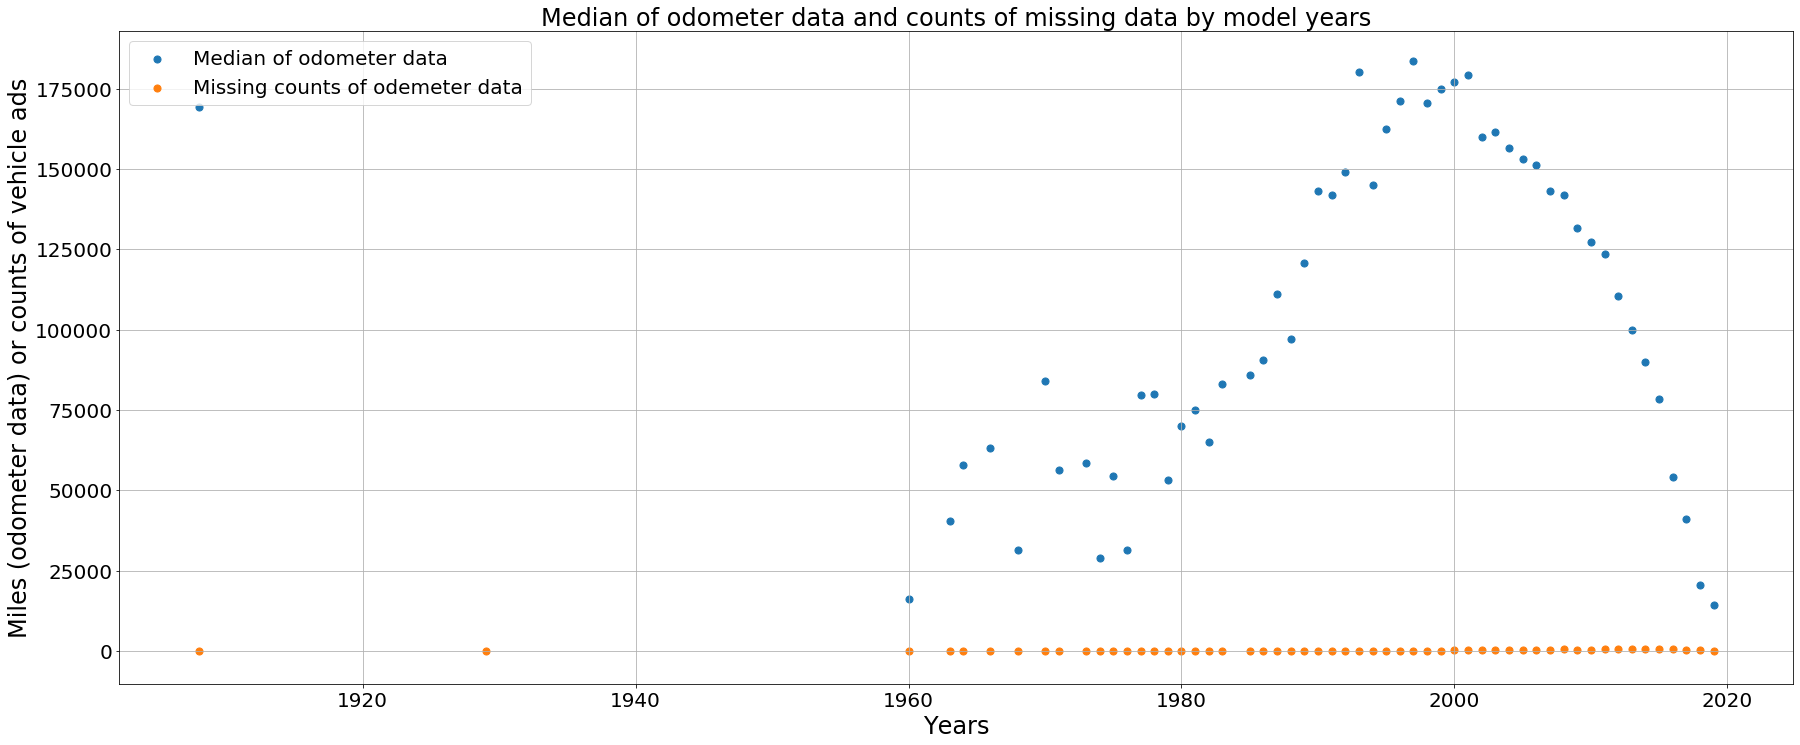

In [24]:
# Plot the number of ads by model year
plt.figure(figsize=(30, 12))
plt.scatter(pivot_OD_2.index, pivot_OD_2['median'], s=50, label='Median of odometer data')
plt.scatter(pivot_OD_2_NaN.index, pivot_OD_2_NaN, s=50, label='Missing counts of odemeter data')
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.title("Median of odometer data and counts of missing data by model years", fontsize= 24)
plt.xlabel("Years", fontsize= 24)
plt.ylabel("Miles (odometer data) or counts of vehicle ads", fontsize= 24)
plt.grid(b=True)
plt.legend(fontsize=20)
plt.show()


Note that we plot the counts to visually see where the missing data is located on the x-axis. We can see that in our dataset the missing values in the odometer column arise for vehicles produced after the $60s$. Only two points fall prior to this period. As for the median values of the available odometer data, we observe three different behaviors in three different periods of time. The ads for model years between $1960$ and $1980$ display a scattered pattern. Nevertheless, the pattern hints rather to a positive correlation between model year and mileage. Interestingly this trend is clearly observed for the model years between $1980$ and $2000$. The trend is reversed from $2000$ onwards, where the medians of odometer data is decreasing with increasing model years. So, something interesting seems to be happening here. Yet, we had already pointed out that vehicle in the $60$s and $70$s had limited display capabilities for the maximum odometer data they could display. Now, this would make the odometer data for older models not accurate, but even so this is a feature of the data, rather than the result of erroneous entries.

Let us also make a similar plot for the 'price' data in the x-axis.

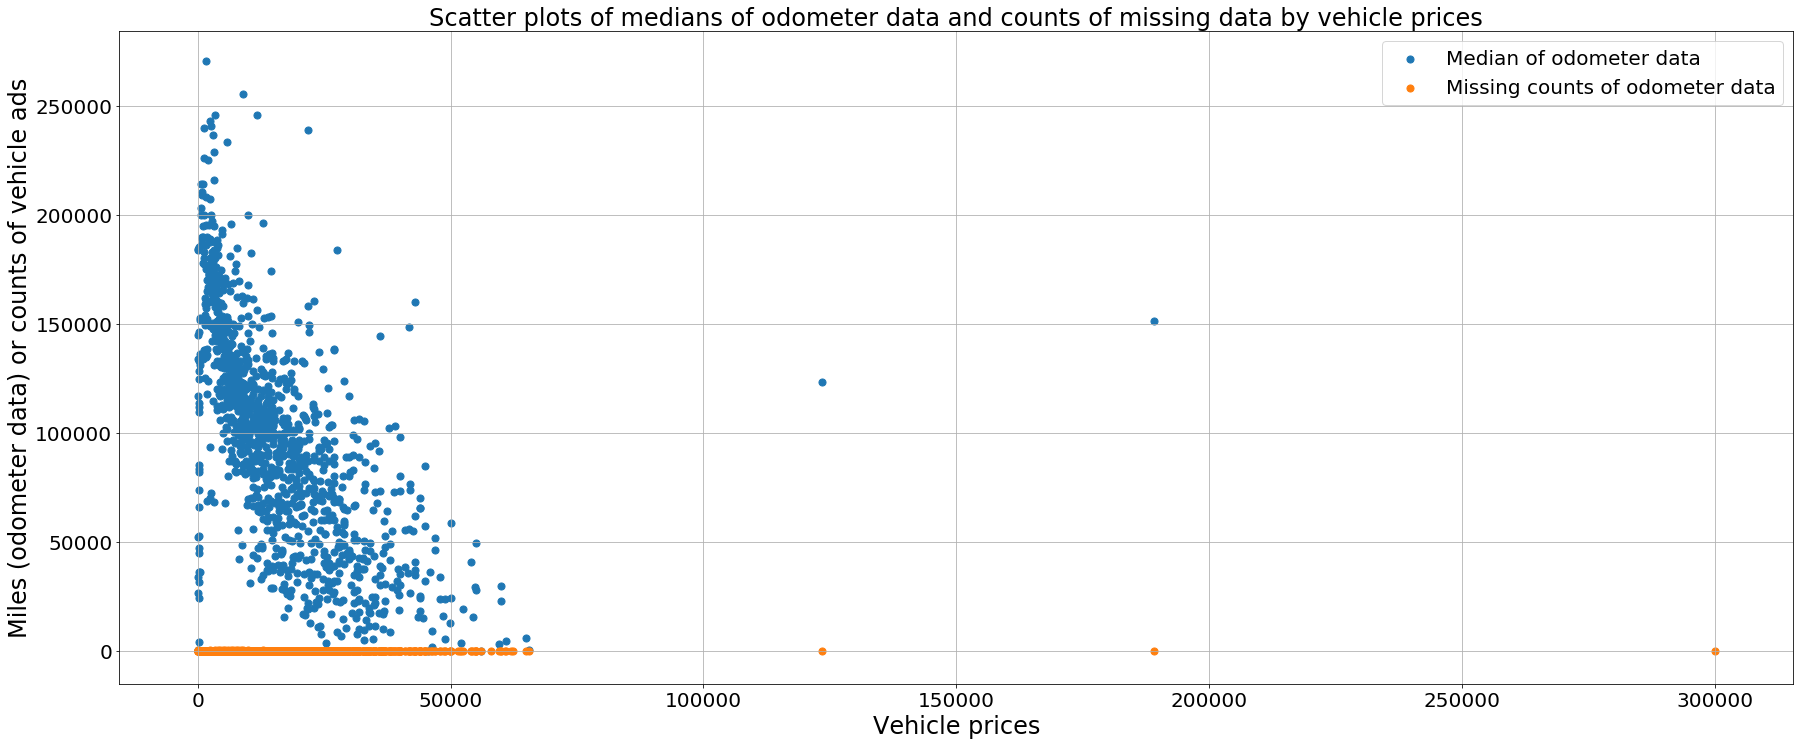

In [25]:
# Create a pivot table showing the per model year mean and median of the 'odometer' column
pivot_OD_3 = pd.pivot_table(index=['price'], values='odometer', aggfunc=['mean', 'median'], data=data_OD)
# Rename the columns for convenience
pivot_OD_3.columns = ['mean', 'median']
# Create a pivot table showing the per model year number of ads with missing 'cylinders' data
pivot_OD_3_NaN = pd.pivot_table(index='price', aggfunc='size', data=data_OD_NaN)

# Add the previous pivot table's column counting missing values to the new pivot table
pivot_OD_3['missing_counts'] = pivot_OD_3_NaN
# Drop rows where there are no missing counts
pivot_OD_3.dropna(subset=['missing_counts'], inplace=True)

# Add the value counts to the pivot table via join()
pivot_OD_3 = pivot_OD_3.join(data['model_year'].value_counts())
# Rename the columns for convenience
pivot_OD_3.rename(columns={'model_year':'value_counts'}, inplace=True)

# Plot the number of ads by model year
plt.figure(figsize=(30, 12))
plt.scatter(pivot_OD_3.index, pivot_OD_3['median'], s=50, label='Median of odometer data')
plt.scatter(pivot_OD_3_NaN.index, pivot_OD_3_NaN, s=50, label='Missing counts of odometer data')
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.title("Scatter plots of medians of odometer data and counts of missing data by vehicle prices", fontsize= 24)
plt.xlabel("Vehicle prices", fontsize= 24)
plt.ylabel("Miles (odometer data) or counts of vehicle ads", fontsize= 24)
plt.grid(b=True)
plt.legend(fontsize=20)
plt.show()


We observe from the above plot that for extremely cheap prices, odometer data of the ads can be almost anything. But as the price increases, we start observing an enlarging band of decreasing median values for the odometer data. Still, 
the large band indicates a big marging of variation. (We did not observe so many points in the plot for model year, since the price behaves rather as a continuous variable, while the years are discrete.) 

The condition of the vehicle is yet another factor that can hint about its mileage. So, let us check mileages for the respective condition categories.

In [26]:
# Create a pivot table showing summary statistics of odometer data for respective vehicle conditions
pivot_OD_4 = pd.pivot_table(index='condition', values='odometer', 
                            aggfunc=['mean', 'median', 'min', 'max'], data=data_OD)

# Create a pivot table showing the number of missing odometer data for respective vehicle conditions
pivot_OD_4.columns = ['mean', 'median', 'min', 'max']
pivot_OD_4_NaN = pd.pivot_table(index='condition', aggfunc='size', data=data_OD_NaN)

# Add the second pivot table's counts of missing values to the first one as a new column
pivot_OD_4['missing_counts'] = pivot_OD_4_NaN
# Drop rows where there are no missing counts
pivot_OD_4.dropna(subset=['missing_counts'], inplace=True)

# Add value counts of the 'condition' column to the pivot table vai join
pivot_OD_4 = pivot_OD_4.join(data['condition'].value_counts())
# Rename the columns for convenience
pivot_OD_4.rename(columns={'condition':'value_counts'}, inplace=True)

# Display the pivot table sorted with respect to the median values
display(pivot_OD_4.sort_values(by='median'))


,mean,median,min,max,missing_counts,value_counts
condition,,,,,,
new,43476.056000,8002.0,5.0,315000.0,18,143
like new,79426.738166,72982.5,0.0,990000.0,728,4742
excellent,106687.682258,104230.0,0.0,980000.0,3800,24773
good,129919.930980,129000.0,0.0,990000.0,3092,20145
salvage,140919.989796,142673.5,0.0,482000.0,17,115
fair,183062.233577,181613.0,0.0,500000.0,237,1607


From the above table we see that as the condition of the car improves, both the mean and median mileage values are steadily decreasing. Thus, in addition to model year data, we suggest to also use data on the vehicle's condition to group the ads. We only need to decide whether to use the mean or median of the grouped data to fill the missing values. Initially, we found out that the mean and median of all the entries in this column were very close to each other, even though some entries seemed not to be acccurate. We also see similar trends in the above pivot table and the one before, except for vehicles advertised as 'new' or few model years. Although the outliers are only found in a small portion of the groups in which they pull the mean significantly away from the median. Let us visualize how the median odometer values look when we further group data for respective vehicle conditions. 

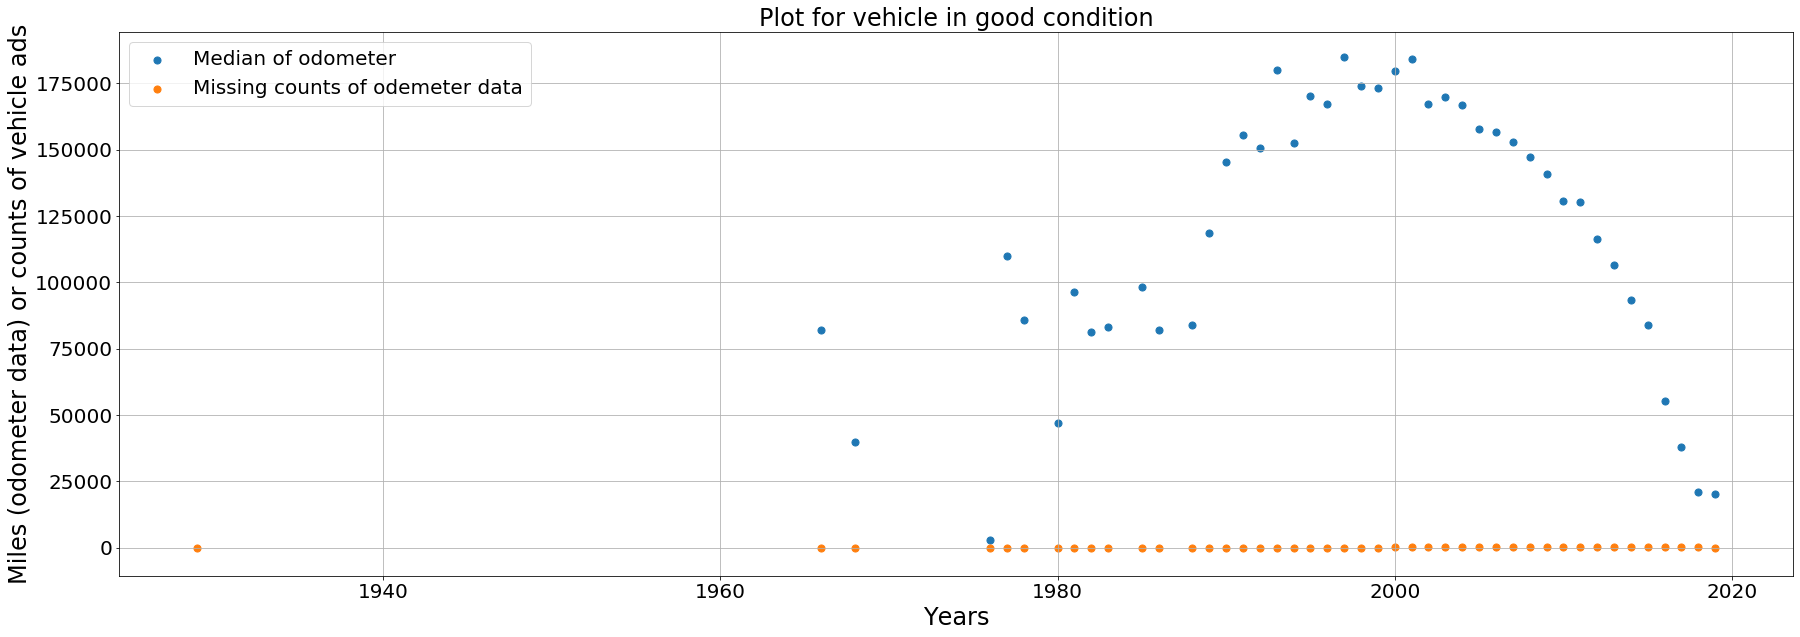

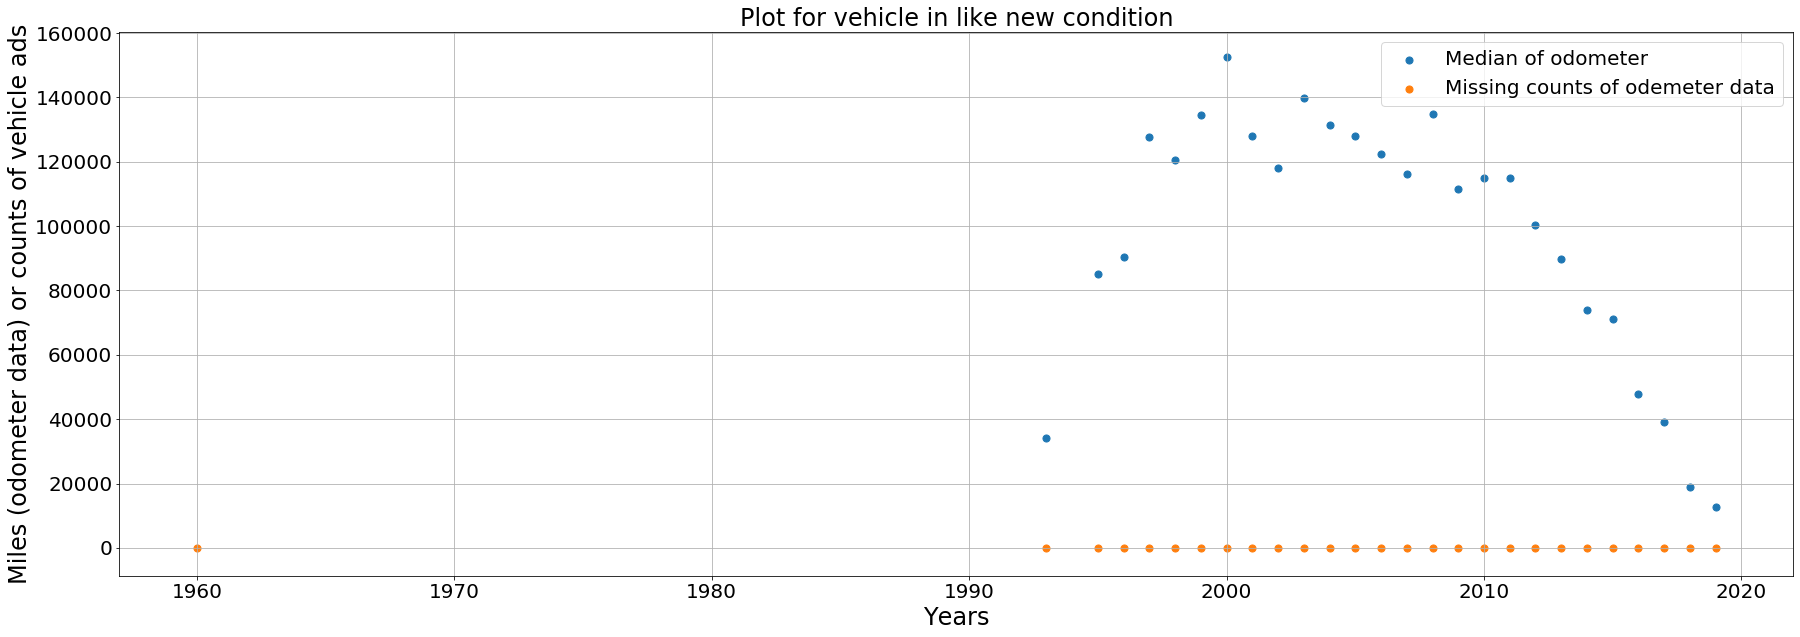

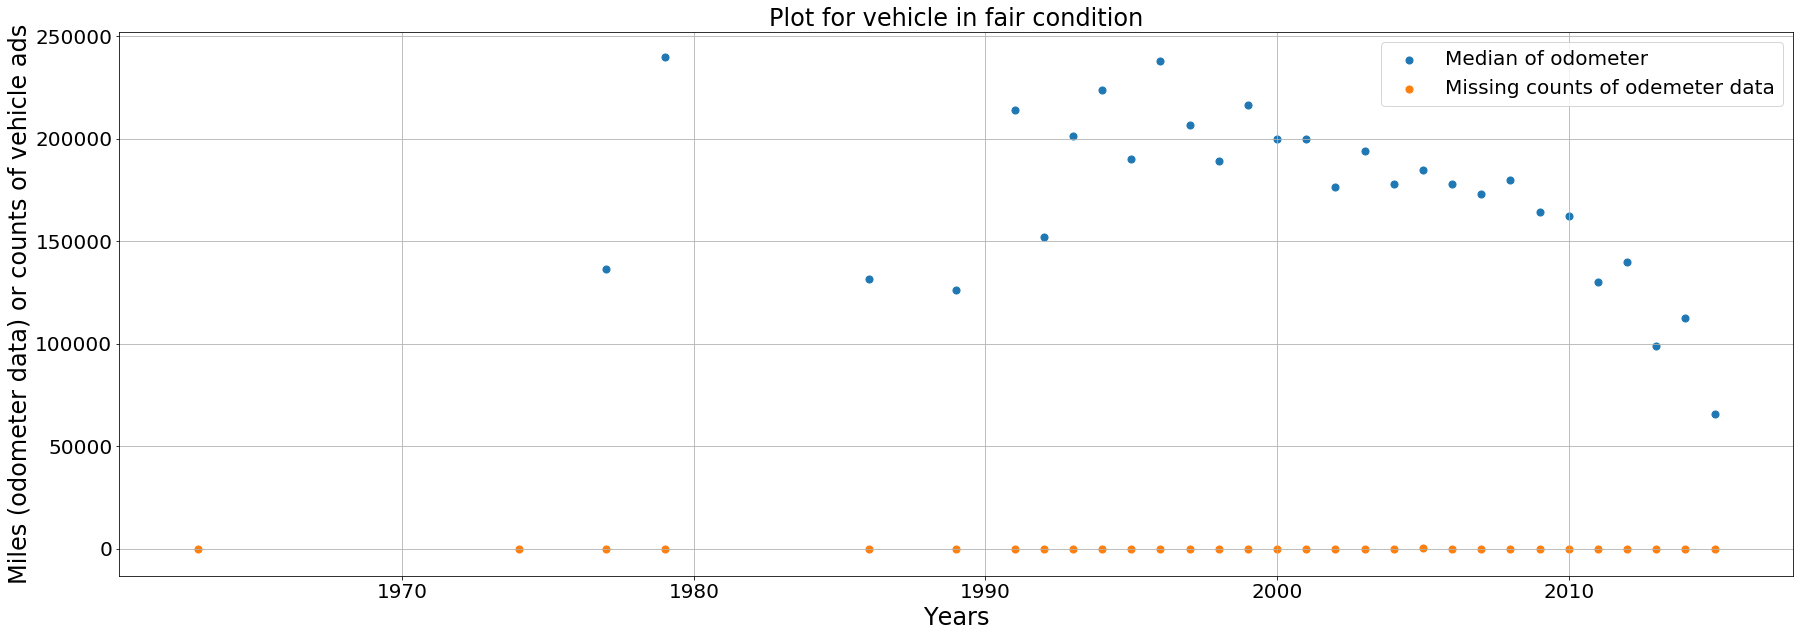

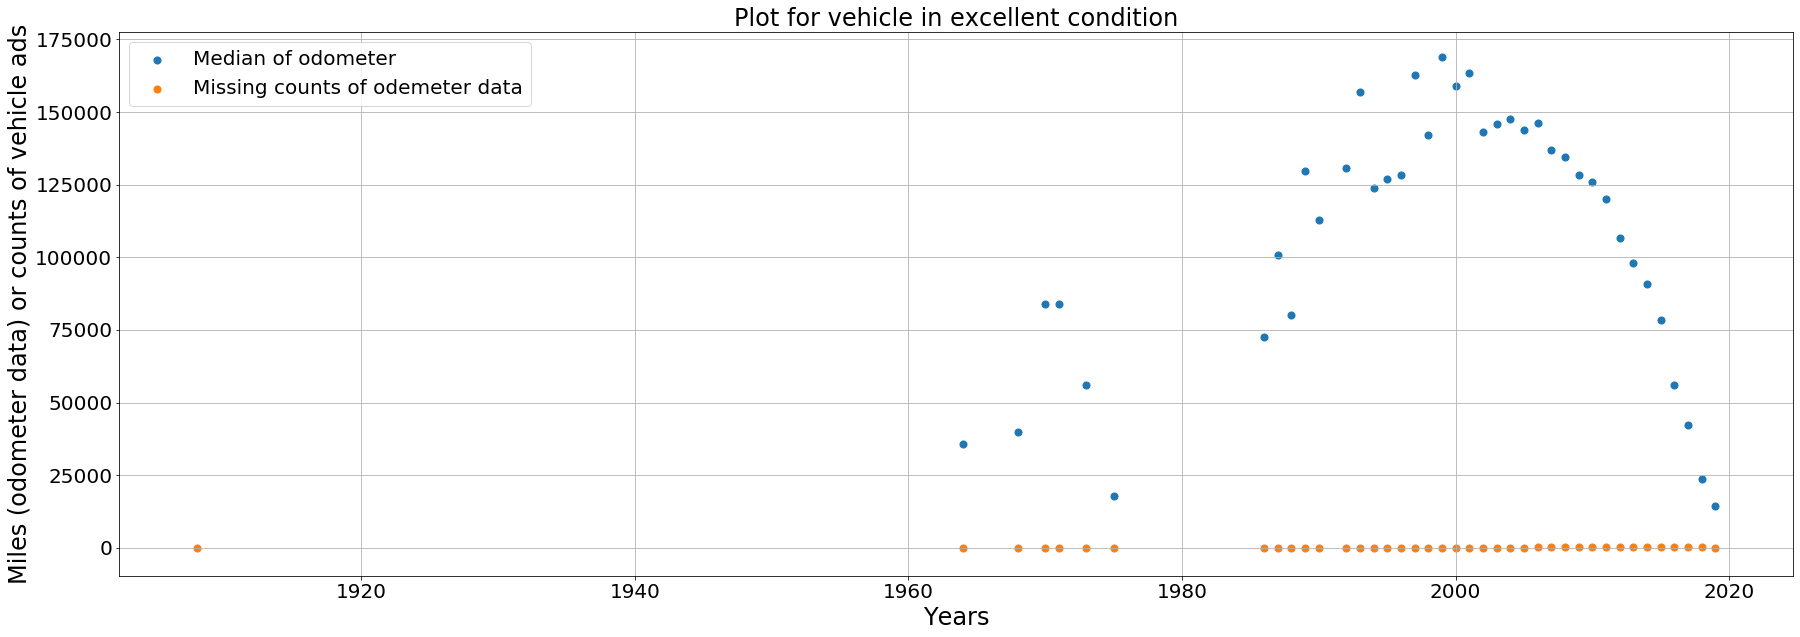

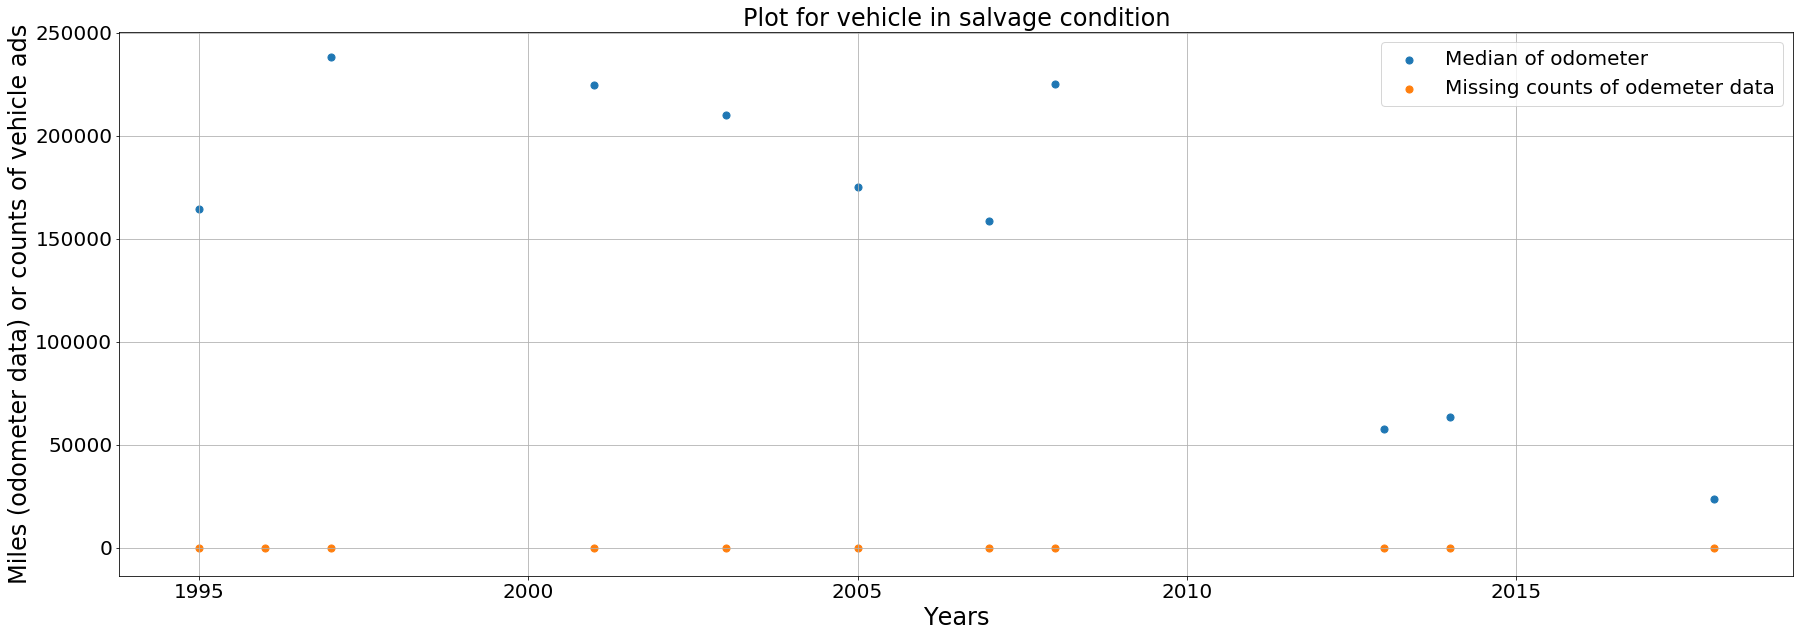

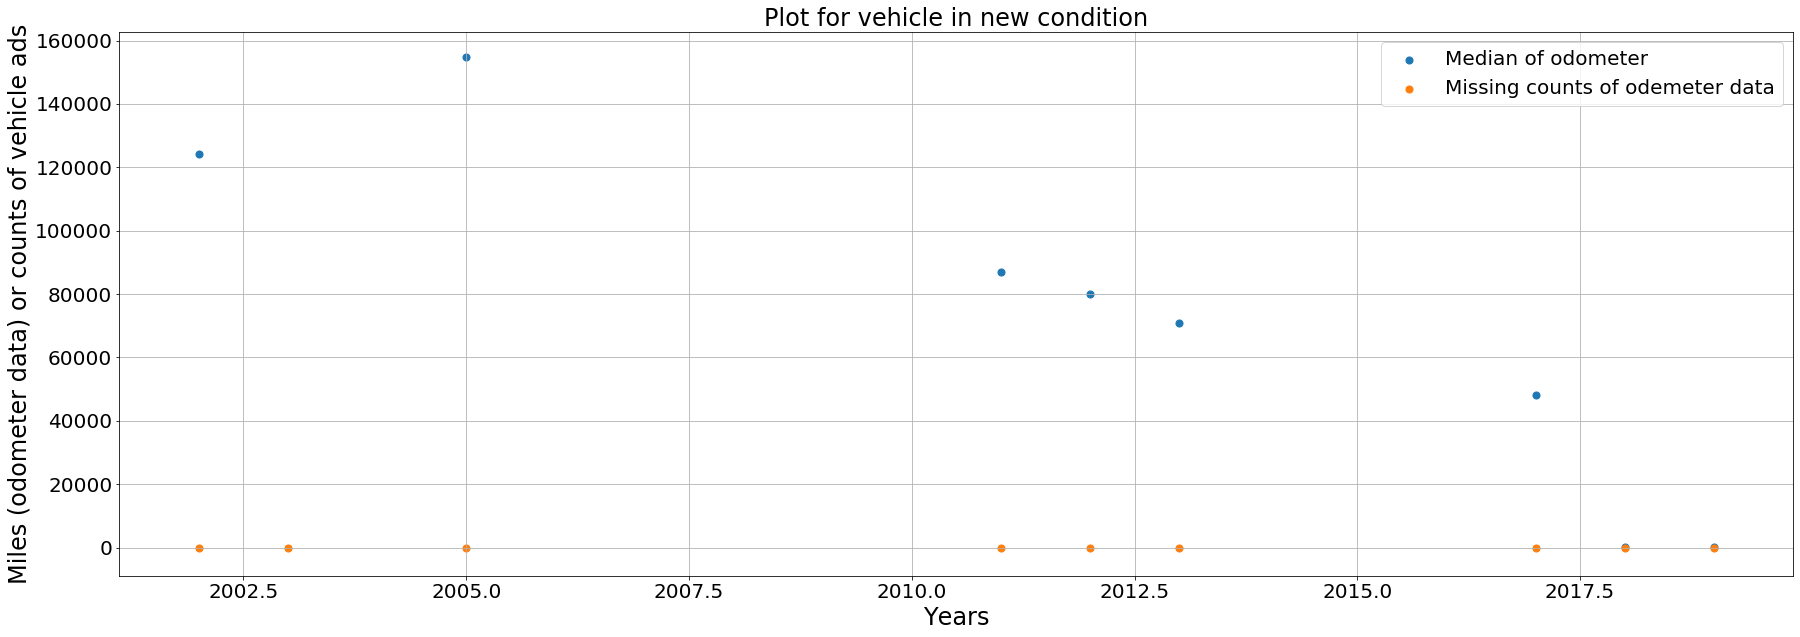

In [27]:
# Plot per model year median values of odometer data for respective vehicle conditions
for col in data['condition'].unique():
    # Filter out rows where 'odometer' is NaN from raw data and store separately
    data_OD_2 = data.loc[(~data['odometer'].isnull()) & (data['condition'] == col)].copy()
    # Store rows where 'odometer' is NaN separately
    data_OD_2_NaN = data.loc[(data['odometer'].isnull()) & (data['condition'] == col)].copy()

    # Create a pivot table showing the per model year mean and median of the 'odometer' column
    pivot_OD_5 = pd.pivot_table(index=['model_year'], 
                            values='odometer', aggfunc=['mean', 'median'], data=data_OD_2)
    # Rename the columns for convenience
    pivot_OD_5.columns = ['mean', 'median']
    # Create a pivot table showing the per model year number of ads with missing 'cylinders' data
    pivot_OD_5_NaN = pd.pivot_table(index=['model_year'], aggfunc='size', data=data_OD_2_NaN)

    # Add the previous pivot table's column counting missing values to the new pivot table
    pivot_OD_5['missing_counts'] = pivot_OD_5_NaN
    # Drop rows where there are no missing counts
    pivot_OD_5.dropna(subset=['missing_counts'], inplace=True)

    # Plot the number of ads by model year
    plt.figure(figsize=(30, 10))
    plt.scatter(pivot_OD_5.index, pivot_OD_5['median'], s=50, label='Median of odometer')
    plt.scatter(pivot_OD_5_NaN.index, pivot_OD_5_NaN, s=50, label='Missing counts of odemeter data')
    plt.xticks(fontsize= 20)
    plt.yticks(fontsize= 20)
    plt.title("Plot for vehicle in {} condition".format(col), fontsize= 24)
    plt.xlabel("Years", fontsize= 24)
    plt.ylabel("Miles (odometer data) or counts of vehicle ads", fontsize= 24)
    plt.grid(b=True)
    plt.legend(fontsize=20)
    plt.show()
    

So, we suggest to fill missing values in the odometer column by grouping data for respective condition and model years. As the model year data has itself missing values, we should first fill that column to avoid ending up with missing values that cannot be assigned to any of the groups. 

In [28]:
# Create a pivot table showing summary statistics of odometer data for respective vehicle conditions
pivot_OD_6 = pd.pivot_table(index=['condition', 'model_year'], values='odometer', 
                            aggfunc='median', data=data_OD)
pivot_OD_6_NaN = pd.pivot_table(index=['condition', 'model_year'], aggfunc='size', data=data_OD_NaN)


# Print the number of common rows in the pivot tables
print("Non-null data in the 'odometer' column have {} groups".format(len(pivot_OD_6)))
print("Null data in the 'odometer' column have {} groups".format(len(pivot_OD_6_NaN)))
print("Number of overlapping groups in null and non-null 'odometer' data:",
    len(pivot_OD_6.merge(pivot_OD_6_NaN.to_frame(), how = 'inner', left_index=True, right_index=True)))


Non-null data in the 'odometer' column have 263 groups
Null data in the 'odometer' column have 162 groups
Number of overlapping groups in null and non-null 'odometer' data: 155


We have $7$ groups with missing 'odometer' data, which we cannot fill using observed data statistics. For these groups, we suggest to fill the missing values with the median for respective vehicle conditions. 

<span style="color:blue">**transmission:**</span> 

In [29]:
# Display summary statistics and value counts for 'transmission' column
display(data['transmission'].describe().to_frame(name = 'transmission stats'))
display(data['transmission'].value_counts().to_frame(name = ' transmission counts'))


,transmission stats
count,51525
unique,3
top,automatic
freq,46902


,transmission counts
automatic,46902
manual,2829
other,1794


- This column contains categorical data on the vehicle's transmission system. Data is stored as 'string' objects. 
- There are $3$ categories defined as 'automatic', 'manual', and 'other'. About $91\%$ of the ads appeared for vehicles having an automatic transmission system.  

<span style="color:blue">**type:**</span> 

In [30]:
# Display summary statistics and value counts for 'type' column
display(data['type'].describe().to_frame(name = 'type stats'))
display(data['type'].value_counts().to_frame(name = 'type counts'))


,type stats
count,51525
unique,13
top,SUV
freq,12405


,type counts
SUV,12405
truck,12353
sedan,12154
pickup,6988
coupe,2303
wagon,1541
mini-van,1161
hatchback,1047
van,633
convertible,446


- This column contains categorical data indicating the type of the vehicle with objects of type 'string'. 
- There are $13$ categories defined as 'SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible', 'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'. Among these categories, SUVs, trucks, and sedans were the most frequently advertised vehicle types, each appearing in about $24\%$ of the ads. 

<span style="color:blue">**paint_color:**</span> 

In [31]:
# Display summary statistics and value counts for 'paint' column
display(data['paint_color'].describe().to_frame(name = 'paint_color stats'))
display(data['paint_color'].value_counts().to_frame(name = 'paint_color counts'))


,paint_color stats
count,42258
unique,12
top,white
freq,10029


,paint_color counts
white,10029
black,7692
silver,6244
grey,5037
blue,4475
red,4421
green,1396
brown,1223
custom,1153
yellow,255


Let us plot the counts in a histogram

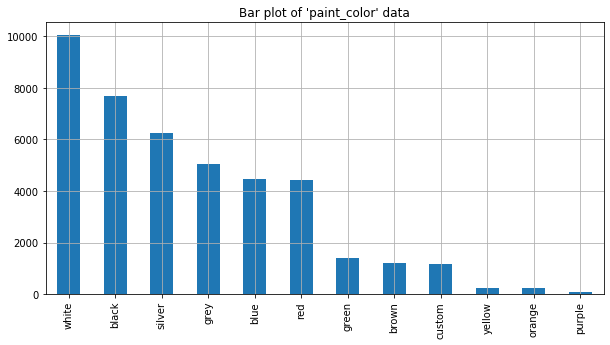

In [32]:
# Display the scatter plot for the retrieved model's non-null counts by observed model years. 
data['paint_color'].value_counts().plot(kind='bar', title= "Bar plot of 'paint_color' data", grid=True,
                                       figsize=(10, 5))


- This column contains categorical data indicating the color of the advertised vehicles. Data is stored as 'string' objects.
- There are in total 12 colors that appear in this column. Those are 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom', 'orange', 'yellow', 'brown', 'green', 'purple'. The most frequent vehicle color, which appeared in almost $24\%$ of the ads, is white. It is followed by black with an ad frequency of about $15\%$. 

❗<span style="color:red">**Missing values spotted:**</span> In Step 1, we found out that $18\%$ of the data in this column is missing. Why could this data be missing? It is not possible the ad owners do not know the color of the vehicles. It is difficult to have a convincing guess, nevertheless let us try come up with few ideas. It is possible that the ad owner did not felt filling this information, because the car is one of the basic colors, like white, black, or grey. For more fancy colors, we fill like the ad owner would want to specify this information. For the missing ads, the owner probably do not perceive the color as a factor that would affect the price of the advertised vehicle. It is also possible the missing values indicate a bug in the site, but we are not able at this point to find what exactly could have gone wrong.

In [33]:
# Filter out rows where 'paint_color' is NaN from raw data and store separately
data_PC = data.loc[~data['paint_color'].isnull()].copy()
# Store rows where 'paint_color' is NaN separately
data_PC_NaN = data.loc[(data['paint_color'].isnull())].copy()

# Create a pivot table showing the per model number of ads for the paint color categories
pivot_PC_L1 = pd.pivot_table(index=['model']
                          , columns='paint_color' , aggfunc='size', data=data_PC)
# Create a pivot table showing the per model number of ads with missing 'paint_color' data
pivot_PC_L1_NaN = pd.pivot_table(index=['model']
                           , aggfunc='size', data=data_PC_NaN)

# Add the second pivot table's counts of missing values to the first one as a new column
pivot_PC_L1['missing_counts'] = pivot_PC_L1_NaN
# Drop rows where there are no missing counts
pivot_PC_L1.dropna(subset=['missing_counts'], inplace=True)

# Compute percentages in each row
pivot_PC_L1_prob = pivot_PC_L1.div(pivot_PC_L1.sum(axis=1), axis=0).multiply(100).round(2)
# Rename column
pivot_PC_L1_prob.rename(columns={'missing_counts': 'missing_counts_%'}, inplace=True)
# Display summary statistics for the missing count percentages
display(pivot_PC_L1_prob['missing_counts_%'].describe())


count    100.000000
mean      18.011700
std        1.851288
min       13.730000
25%       16.880000
50%       17.880000
75%       19.305000
max       23.430000
Name: missing_counts_%, dtype: float64

As in the cases of the 'model_year' and 'cylinders' columns, it is reasonable to assume that data is missing at random in the 'paint_color' column. In fact, the per model summary statistics occur around $18\%$.

We would expect the paint color of a vehicle to be quite independent of most vehicle properties (except the fact that some colors may not be sold by the manufacturer for a given model), except the price. However, the price itself depends on a lot of vehicle properties. So, it doesn't seem appropriate to fill the missing values in this column just by grouping the data by model, type, etc, or even price, and using the summary statistics of the groups. Let us display the pivot table for data grouped per model. 

In [34]:
# Counting the number of missing values in the 'model_year' column for respective vehicle properties,
display(pivot_PC_L1_prob)


paint_color,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow,missing_counts_%
model,,,,,,,,,,,,,
acura tl,18.64,3.81,0.85,0.85,2.97,23.31,NaN,NaN,2.12,15.25,11.02,0.85,20.34
bmw x5,24.72,5.99,2.25,0.75,1.87,15.73,NaN,0.37,0.37,11.99,14.23,NaN,21.72
buick enclave,11.07,7.75,7.75,4.06,0.74,7.75,NaN,1.48,8.12,10.33,25.46,NaN,15.50
cadillac escalade,31.37,1.86,2.80,2.17,1.24,3.42,NaN,NaN,2.80,6.83,27.64,NaN,19.88
chevrolet camaro,18.12,5.07,0.48,1.21,3.14,8.21,1.69,NaN,20.53,11.59,8.94,3.62,17.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
toyota sienna,7.29,13.68,3.34,7.29,4.26,11.25,NaN,0.30,6.08,14.29,11.85,0.61,19.76
toyota tacoma,12.58,4.47,2.42,1.21,2.78,11.37,0.24,0.24,9.31,16.69,20.92,0.12,17.65
toyota tundra,13.93,8.46,2.32,0.66,2.49,12.60,0.33,0.17,8.46,11.61,20.56,NaN,18.41


Scanning the table, we can see that if we fill the missing values by the mode of each group, we would end up too much distorting the color distributions for each model, since $18\%$ of data would be mapped to a particular color. Similarly, if we use the mode of the entire column, i.e., white color, we would end up giving artificially too much weight in just one color. Since we want to investigate in Step 4 the influence of the paint color to the price of the vehicles, we suggest to add as an option the 'unknown' category to the paint colors and map NaN values in raw data to it. 

<span style="color:blue">**is_4wd:**</span> 

In [35]:
# Display summary statistics and value counts for 'is_4wd' column
display(data['is_4wd'].describe().to_frame(name = 'is_4wd stats'))
display(data['is_4wd'].value_counts().to_frame(name = 'is_4wd counts'))


,is_4wd stats
count,25572.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


,is_4wd counts
1.0,25572


- This column contains categorical data on whether the vehicle has 4-wheel drive.
- Although the description given to us by the company indicates that the stored information is of Boolean type, we saw in Step 1 that the data in this column is of type 'float64'. We suspected that this is due to the presence of missing NaN values. Here, we found out that actually the non-null data in this column takes only the value $1$. This value, which tells us that the vehicle has 4-wheel drive, appeared in about $50\%$ of the ads.
- As usual, we need to first handle the missing values to be able to convert the data type of this column to Boolean. Note also that 'True' and 'False' are cast implicitly into integers $1$ and $0$, respectively, in Python. 

❗<span style="color:red">**Missing values spotted:**</span> We know, on one hand, that about half of the data in this column have as value NaN, and on the other hand, we know that the other half have value $1$. It looks like either due to some technical loophole in the site or purposefully because it is clear from context, that the ads indicating the value False for this field were stored as NaN in the site's database. Is it reasonable that about half of the advertised vehicles have 4-wheel drives? We do not have market data that could help us further support or reject our hypothesis. However, some websites mention about the trend being along these lines. See for instance, https://fordauthority.com/2020/05/popularity-of-four-wheel-drive-vehicles-growing-rapidly/

<span style="color:blue">**date_posted:**</span>

In [36]:
# Display summary statistics and value counts for 'date_posted' column
display(data['date_posted'].describe().to_frame(name = 'date_posted stats'))
display(data['date_posted'].value_counts().to_frame(name = 'date_posted counts'))


,date_posted stats
count,51525
unique,354
top,2019-03-17
freq,186


,date_posted counts
2019-03-17,186
2019-01-05,184
2018-09-20,178
2019-03-11,176
2018-10-09,174
...,...
2018-06-18,119
2018-07-04,118
2019-01-11,117
2018-06-08,117


- This column reports quantitative data about the dates the ads were published. However, the data is stored as objects of type 'string'.
- In this current string format, data in this column is not really useful. As we see from the above code output, we are not able to identify the range of dates the ads in our dataset were posted on the site. To make good use of the data in this column, we need to be able to access the day, month, and year elements separately. We thus suggest to convert the data to 'datetime' objects. 

<span style="color:blue">**days_listed:**</span>

In [37]:
# Display summary statistics and value counts for 'days_listed' column
display(data['days_listed'].describe().to_frame(name = 'days_listed stats'))
display(data['days_listed'].value_counts().to_frame(name = 'days_listed counts'))


,days_listed stats
count,51525.00000
mean,39.55476
std,28.20427
min,0.00000
25%,19.00000
50%,33.00000
75%,53.00000
max,271.00000


,days_listed counts
18,959
24,950
22,945
19,941
20,934
...,...
263,1
182,1
261,1
217,1


- The final column contains quantitative data about the number of days the ads were listed from publication to removal. The data is stored as integers of type 'int64'.
- We see that the ads were listed between $0$ to $271$ days, with the mean and median values being slightly more than a month. We will further discuss the summary statistics and outliers in this column in Step 4.

**Initially, I was checking for duplicates here, but I moved the cells to Step 1.**

<span style="color:blue">**Date preprocessing tasks list:**</span> 

Let us summarize how we decided to preprocess raw data:

1. Filling missing values:
    - Task 1: When possible, sample the missing values in the 'model_year' column from the relative frequency distributions of the available 'model_year' data grouped by 'model', 'type', 'transmission', and 'fuel' columns, and limited by the year indicated in the 'date_posted' column. Otherwise, fill with the mode of 'model_year' data grouped by the 'model' column
    - Task 2: When possible, fill the missing values in the 'cylinders' column with the mode per 'model', 'type', 'transmission', and 'fuel'. Otherwise, fill with the mode of the 'cylinders' column.
    - Task 3: When possible, fill missing values in the 'odometer' column by grouping data for respective condition and model years. Otherwise, fill with the median of the 'odometer' data grouped by the 'condition' column only.
    - Task 4: Fill missing values in 'paint_color' column as 'unknown'.
    - Task 5: Fill NaN values in the 'is_4wd' column with False.

2. Replacing data types:
    - Task 6: Convert the float data type to integers, once missing values are filled. This concern the 'model_year', 'cylinders', 'odometer', 'is_4wd' columns.
    - Task 7: Convert string data in the 'days_posted' column to 'datetime' objects. 

3. Mapping categorical variables to id columns:
    - Task 8: Map all categorical variables to integer id columns. Store the correspondances in dictionaries, and drop all the non-numeric columns from the dataset.
    
Now that we have a clear roadmap, let us implement our data preprocessing strategy.

In [38]:
# Create a copy of raw data
data_preproc = data.copy()

# Display info
data_preproc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [39]:
# Filling missing values working with the copy

#### Task 1 ####
# Sample the missing values in the 'model_year' column from the relative frequency distributions 
#               of the available 'model_year' data grouped by 'model', 'type', 'transmission' and 'fuel' data.
#### ###### ####


# Create a pivot table showing the per model number of ads for all model years
pivot_MY_L4 = pd.pivot_table(index=['model','type', 'transmission', 'fuel'],
                columns='model_year' , aggfunc='size', data=data_MY) # No-null values are stored in data_MY

# Compute relative frequencies in each row
pivot_MY_L4 = pivot_MY_L4.div(pivot_MY_L4.sum(axis=1), axis=0)

# Reset index of pivot table
pivot_MY_L4.reset_index(inplace=True)


# Iterate over the rows of the dataframe where 'model_year' data is missing
e = 0
for index, row in data_preproc.loc[data_preproc['model_year'].isnull()].iterrows():
    m = row['model'] 
    t = row['type']
    r = row['transmission']
    f = row['fuel']
    d = pd.to_datetime(row['date_posted'], format='%Y-%m-%d', errors='coerce').year
    # Query group from pivot table
    v = pivot_MY_L4.query('model == @m and type == @t and transmission==@r and fuel==@f') 
    # If the group is observed in the pivot table, proceed to sampling
    if not v.empty:
        elements = list((v.iloc[0, 4:]).dropna().index) # Get list of observed model years for group
        probabilities = list((v.iloc[0, 4:]).dropna().values)  # Get list of observed relative frequencies for group
        # Remove any date in lists which is greater than date in 'date_posted'.
        for i in range(len(elements)):
            if elements[i] > d:
                elements.remove(elements[i])
                probabilities.remove(probabilities[i])
        # normalize probabilities again
        probabilities = [j/sum(probabilities) for j in probabilities]
        sample = np.random.choice(elements, 1, p=probabilities) # Sample from distribution
        data_preproc.iloc[index, 1] = sample  # Assign sample to 'model_year' column of row
    else:
        e += 1

# Fill the remaining missing values with the mode for respective models
data_preproc['model_year'] = (data_preproc.groupby(['model'])['model_year']
                  .transform(lambda grp: grp.fillna(grp.mode()[0])))
# Display info
data_preproc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [40]:
#### Task 2 ####
# Fill the missing values in the 'cylinders' column with the mode per 'model', 'type', 'transmission', and 'fuel'.
#### ###### ####

# The following code does not function as expected
data_preproc['cylinders'] = (data_preproc.groupby(['model', 'type', 'transmission', 'fuel'])['cylinders']
                  .transform(lambda grp: grp.fillna(grp.mode())))
# The above code functions when we groupby model column only
# Adding the accessor [0] after mode does result in error
# This is probably due to empty groups

# Display info
data_preproc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [41]:
# Create a pivot table showing the per model/type/transmission/fuel number of ads for the cylinder categories
pivot_d = pd.pivot_table(index=['model','type', 'transmission', 'fuel']
                          , columns='cylinders' , aggfunc='size', data=data_preproc)

cylinder_n = data_preproc.loc[data_preproc['cylinders'].isnull()]
# Create a pivot table showing the per model/type/transmission/fuel missing number of ads for 'cylinders' data
pivot_n = pd.pivot_table(index=['model','type', 'transmission', 'fuel']
                           , aggfunc='size', data=cylinder_n)

# Compute and add mode to the pivot table
pivot_d['mode'] = pivot_d.apply(lambda x: x.idxmax(), axis=1)

# Add the second pivot table's counts of missing values to the first one as a new column
pivot_d['missing_counts'] = pivot_n
# Drop rows where there are no missing counts
pivot_d.dropna(subset=['missing_counts'], inplace=True)

# Set the value of the maximum number of rows that can be displayed to 5000.
pd.set_option('display.max_rows', 5000)
# Dİsplay the first pivot table
pivot_d.reset_index(inplace=True)

e = 0
median_c = data_preproc['cylinders'].median()  # Get median of column
for index, row in data_preproc.loc[data_preproc['cylinders'].isnull()].iterrows():
    m = row['model']
    t = row['type']
    r = row['transmission']
    f = row['fuel']
    v = pivot_d.query('model == @m and type == @t and transmission==@r and fuel==@f')['mode']
    if v.empty:
        e += 1
        data_preproc.iloc[index, 4] = median_c  # If group is empty fill with median value
    else:
        data_preproc.iloc[index, 4] = v.iloc[0]  # Else use the mode data from pivot table


# Display info
display(data_preproc.info())       


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

In [42]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [43]:
#### Task 3 ####
# Fill missing values in the 'odometer' column by grouping data for respective condition and model years.
#### ###### ####

# We first fill missing data grouped by two levels, setting observed key to True
data_preproc['odometer'] = (data_preproc.groupby(['condition', 'model_year'], observed=True)['odometer'].
                    transform(lambda grp: grp.fillna(grp.median())))

# Display info
data_preproc.info()

# We then fill remaining missing data grouped by on levels
data_preproc['odometer'] = (data_preproc.groupby(['condition'])['odometer'].
                    transform(lambda grp: grp.fillna(grp.median())))
    
# Display info
data_preproc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51518 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null ob

In [44]:
#### Task 4 ####
# Fill missing values in 'paint_color' column as 'unknown'.
#### ###### ####
data_preproc['paint_color'].fillna('Unknown', inplace=True)

#### Task 5 ####
# Fill NaN values in the 'is_4wd' column with False.
#### ###### ####
data_preproc['is_4wd'].fillna(0, inplace=True)

# Display info
data_preproc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [45]:
# Replacing data types

#### Tasks 6 and 7 ####
# Cast 'model_year', 'cylinders', 'odometer', 'is_4wd' to 'int64'
# # Cast 'date_posted' to 'datetime64'
#### ###### ####

data_preproc['model_year'] = data_preproc['model_year'].astype('int64')
data_preproc['cylinders'] = data_preproc['cylinders'].astype('int64')
data_preproc['odometer'] = data_preproc['odometer'].astype('int64')
data_preproc['is_4wd'] = data_preproc['is_4wd'].astype('int64')
data_preproc['date_posted'] = pd.to_datetime(data_preproc['date_posted'], format='%Y-%m-%d', errors='coerce')

# Display info
data_preproc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null int64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.1+ MB


In [46]:
# Convert non-numeric columns of categorical data to integer id columns

#### Task 8 ####
# Add id columns for all the categorical data columns. Store the correspondances in 
#                             separate dictionaries and drop the original columns.
#### ###### ####

# Create dictionaries where the keys are category ids and values the category names
model_dict = dict(enumerate(data_preproc['model'].unique()))
condition_dict = dict(enumerate(data_preproc['condition'].unique()))
cylinders_dict = dict(enumerate(sorted(data_preproc['cylinders'].unique())))   # missing values
fuel_dict = dict(enumerate(data_preproc['fuel'].unique()))
transmission_dict = dict(enumerate(data_preproc['transmission'].unique()))
type_dict = dict(enumerate(data_preproc['type'].unique()))
paint_color_dict = dict(enumerate(data_preproc['paint_color'].unique())) # missing values

# Sanity checks
# print(model_dict)
# print(condition_dict)
# print(cylinders_dict)
# print(fuel_dict)
# print(transmission_dict)
# print(type_dict)
# print(paint_color_dict)

# Define a function to invert the key-value pairs of the dictionaries
def create_inv_dict(my_dict):
    """
    The function takes a dictionary object and shift the key-value pairs 
    - Each key of the input dictionary should have a unique value
    """    
    inv_dict = {}
    for k, v in my_dict.items():
        inv_dict[v] = k
    return inv_dict

# Invert the dictionaries using the create_inv_dict() function
inv_model_dict = create_inv_dict(model_dict)
inv_condition_dict = create_inv_dict(condition_dict)
inv_cylinders_dict = create_inv_dict(cylinders_dict)
inv_fuel_dict = create_inv_dict(fuel_dict)
inv_transmission_dict = create_inv_dict(transmission_dict)
inv_type_dict = create_inv_dict(type_dict)
inv_paint_color_dict = create_inv_dict(paint_color_dict)

# Sanity checks
# print(inv_model_dict)
# print(inv_condition_dict)
# print(inv_cylinders_dict)
# print(inv_fuel_dict)
# print(inv_transmission_dict)
# print(inv_type_dict)
# print(inv_paint_color_dict)

# Create missing id columns for categorical data by using the map() method 
#                                        passing as argument the inverted dictionary
data_preproc['model_id'] = data_preproc['model'].map(inv_model_dict)
data_preproc['condition_id'] = data_preproc['condition'].map(inv_condition_dict)
data_preproc['cylinders_id'] = data_preproc['cylinders'].map(inv_cylinders_dict)
data_preproc['fuel_id'] = data_preproc['fuel'].map(inv_fuel_dict)
data_preproc['transmission_id'] = data_preproc['transmission'].map(inv_transmission_dict)
data_preproc['type_id'] = data_preproc['type'].map(inv_type_dict)
data_preproc['paint_color_id'] = data_preproc['paint_color'].map(inv_paint_color_dict)

# Drop all categorical data of type 'string' objects
data_preproc.drop(
    ['model', 'condition', 'cylinders', 'fuel', 'transmission', 'type', 'paint_color'], axis = 1, inplace=True)

# Display info
data_preproc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price              51525 non-null int64
model_year         51525 non-null int64
odometer           51525 non-null int64
is_4wd             51525 non-null int64
date_posted        51525 non-null datetime64[ns]
days_listed        51525 non-null int64
model_id           51525 non-null int64
condition_id       51525 non-null int64
cylinders_id       51525 non-null int64
fuel_id            51525 non-null int64
transmission_id    51525 non-null int64
type_id            51525 non-null int64
paint_color_id     51525 non-null int64
dtypes: datetime64[ns](1), int64(12)
memory usage: 5.1 MB


**Concluding remarks:** In this step, we preprocessed the raw data based on a strategy we decided by investigation the content of each column. Our investigation showed that the issues identified in Step 1 were accurate. We discussed the factors that might have led to the missing values before we proposed remedies to suitably treat them. We filled missing values in all $5$ columns--'model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd'. Although we identified some unrealistic values in the 'price' and 'odometer' data, we did not replace them as they could provide us additional information about the site, the vehicles, or the users. Once the null values were filled, we could proceed converting the float data types to integers. We also converted the date data from string to datetime objects.  This will be useful for the next Step, where we will manipulate data to add new features to our dataset. Finally, we created id columns in our dataset for the categorical data columns and dropped the latter. We can easily recover the original category values using dictionaries we created using the id numbers as keys. 

### Step 3. Data manipulation

In this step, we perform several data manipulation tasks to refine the raw data and make it easier to work with in our codes. These are as follows: 
1. Day of the week, month, and year the ad was placed
2. The vehicle's age (in years) when the ad was placed
3. The vehicle's average mileage per year
4. In the condition column, replace string values with a numeric scale: 'new' = 5, 'like new' = 4, 'excellent' = 3, 'good' = 2, 'fair' = 1, 'salvage' = 0.


In [47]:
# Add day of the week, month, and year the ad was placed as new colums.
# Return the day of the week. It is assumed the week starts on Monday, 
#                 which is denoted by 0 and ends on Sunday which is denoted by 6. 
data_preproc['dayofweek_posted'] = data_preproc['date_posted'].dt.dayofweek
data_preproc['month_posted'] = data_preproc['date_posted'].dt.month
data_preproc['year_posted'] = data_preproc['date_posted'].dt.year
# Check value counts for 'year_posted' colum 
print(data_preproc['year_posted'].value_counts())
print(data_preproc.groupby('year_posted')['month_posted'].value_counts())

print()

# Compute average mileage per year. Add it as a new column
# First compute the vehicle's age (in years) when the ad was place. 
data_preproc['model_age'] = data_preproc['year_posted'] - data_preproc['model_year']
# Create a new column with null values
data_preproc['av_mileage_per_year'] = np.nan
# For rows with 'model_age' = 0, assign value in 'odometer' column
data_preproc.loc[data_preproc['model_age'] == 0, 'av_mileage_per_year'] = (
                          data_preproc.loc[data_preproc['model_age'] == 0, 'odometer'])
# For remaining rows, assign value in 'odometer' column divided by value in 'model_age' column
data_preproc.loc[~data_preproc['model_age'] == 0, 'av_mileage_per_year'] = (
                          data_preproc.loc[~data_preproc['model_age'] == 0, 'odometer']
                        /data_preproc.loc[~data_preproc['model_age'] == 0, 'model_age'])
# Check summary statistics of computed 'model_age' colum 
print(data_preproc['model_age'].describe())
print()

# In the condition column, replace id values of strings with the following numeric scale: 
#       'new' = 5, 'like new' = 4, 'excellent' = 3, 'good' = 2, 'fair' = 1, 'salvage' = 0.
condition_list = ['salvage', 'fair' , 'good', 'excellent', 'like new', 'new']
condition_dict_new = dict(enumerate(condition_list))
inv_condition_dict_new = create_inv_dict(condition_dict_new)
inv_condition_id_dict = dict((list(condition_dict.values()).index(k), v) for (k, v) in inv_condition_dict_new.items())
data_preproc['condition_id'] = data_preproc['condition_id'].map(inv_condition_id_dict)

# Sanity checks
# print(inv_condition_dict)   
# print(inv_condition_dict_new)
# print(inv_condition_id_dict)

# Display info
data_preproc.info()


2018    35683
2019    15842
Name: year_posted, dtype: int64
year_posted  month_posted
2018         10              4643
             12              4564
             5               4503
             8               4480
             7               4471
             9               4452
             11              4354
             6               4216
2019         3               4559
             1               4452
             2               4014
             4               2817
Name: month_posted, dtype: int64

count    51525.000000
mean         8.575565
std          6.306970
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        111.000000
Name: model_age, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
price                  51525 non-null int64
model_year             51525 non-null int64
odometer               51525 non-null int64
is_4wd                

**Concluding remarks:** Manipulating the data in this step was easy, thanks to the preprocessing done in the previous step. Adding to the dataset the day of the week, month, and year attributes of a datetime column, i.e. 'date_posted' was a straightforward task. From the year attribute, we learned that our dataset consists of ads posted in a one year interval between May 2018 and April 2019. Similarly computing the age of the vehicle simply required us to take the entrywise difference of the integer valued 'model_year' and 'date_posted' columns, both of which had no missing values. Re-mapping the condition ids to a different numeric scale was performed using one more time dictionary constructs. The only task we needed to be really meticulous in this step was the computation of the average mileage per year, as the latter involved division by zero. Now, we are ready to dive into the next step where we perform exploratory data analysis on our suitably preprocessed and manipulated dataset.

### Step 4. Exploratory Data Analysis

In this step, we carry several EDA tasks on the dataset. 

1. Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.


Note that the first three parameters are quantitative variables, so we plot histograms using the hist() method. For the last two parameters we will use bar plots since they are categorical variables.

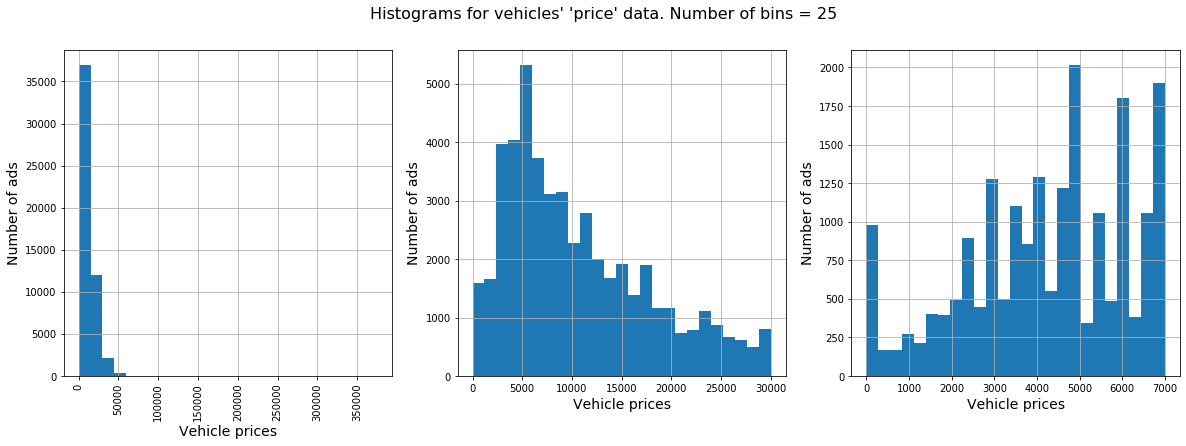

In [48]:
# Plot histograms for 'price' column

# Create Figure and axes.Axes objects of 3 subplots aligned horizontally.
# Set the size of the figure with figsize argument.
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# Create histograms of the 'price' column for the respective features 
# Assign the histogram's axis to the desired elements of the axes array. 
data_preproc['price'].hist(bins=25, ax=axes[0], xrot=90)
axes[0].set_xlabel('Vehicle prices', fontsize=14)
axes[0].set_ylabel('Number of ads', fontsize=14)
data_preproc['price'].hist(bins=25, ax=axes[1], range=(0, 30000))  # Limit x-axis to the given range
axes[1].set_xlabel('Vehicle prices', fontsize=14)
axes[1].set_ylabel('Number of ads', fontsize=14)
data_preproc['price'].hist(bins=25, ax=axes[2], range=(0, 7000))   # Limit x-axis to the given range
axes[2].set_xlabel('Vehicle prices', fontsize=14)
axes[2].set_ylabel('Number of ads', fontsize=14)

plt.subplots_adjust(hspace = 0.4)

# Add title to the plot
plt.suptitle("Histograms for vehicles' 'price' data. Number of bins = 25", fontsize=16)
# Display the plot
plt.show()


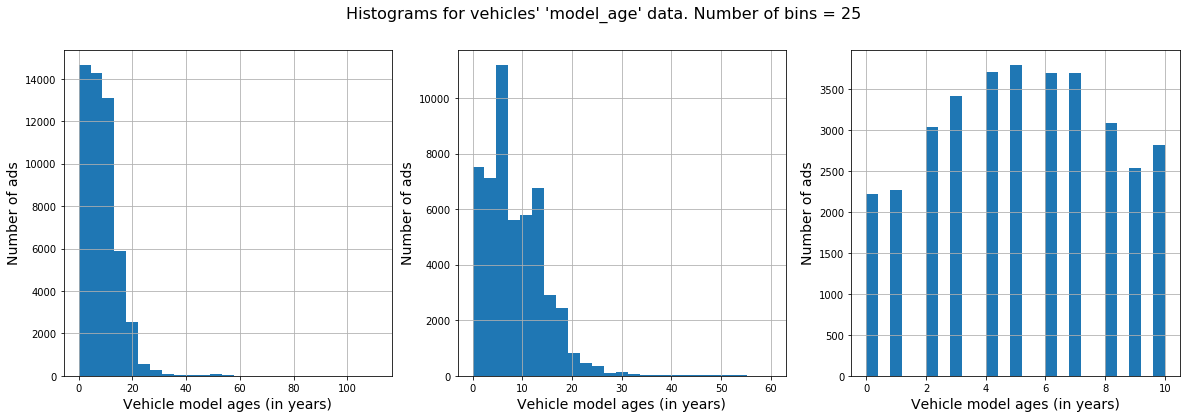

In [49]:
# Plot histograms for 'model_age' column
fig, axes = plt.subplots(1, 3, figsize=(20,6))

data_preproc['model_age'].hist(bins=25, ax=axes[0])
axes[0].set_xlabel('Vehicle model ages (in years)', fontsize=14)
axes[0].set_ylabel('Number of ads', fontsize=14)
data_preproc['model_age'].hist(bins=25, ax=axes[1], range=(0, 60))
axes[1].set_xlabel('Vehicle model ages (in years)', fontsize=14)
axes[1].set_ylabel('Number of ads', fontsize=14)
data_preproc['model_age'].hist(bins=25, ax=axes[2], range=(0, 10))
axes[2].set_xlabel('Vehicle model ages (in years)', fontsize=14)
axes[2].set_ylabel('Number of ads', fontsize=14)
plt.suptitle("Histograms for vehicles' 'model_age' data. Number of bins = 25", fontsize=16)
plt.subplots_adjust(hspace = 0.4)

plt.show()


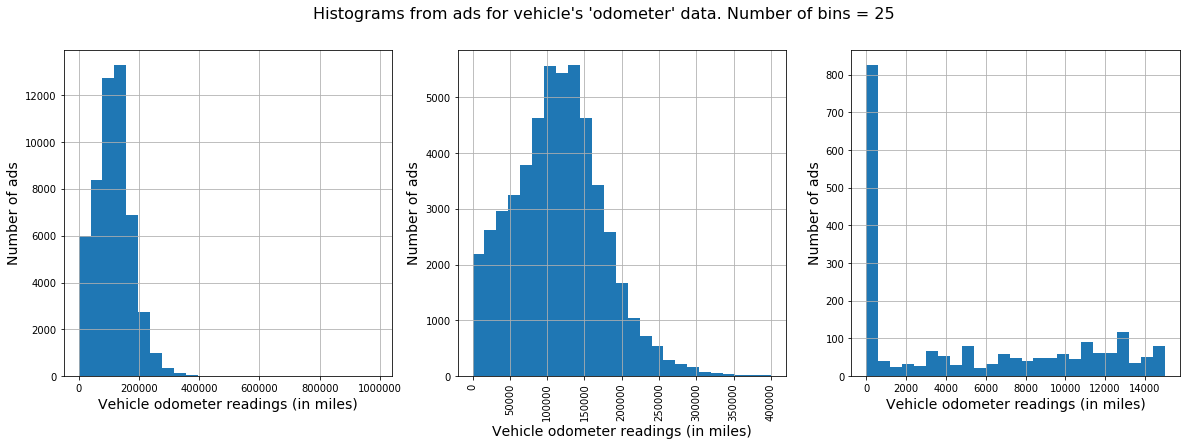

In [50]:
# Plot histograms for 'odometer' column
fig, axes = plt.subplots(1, 3, figsize=(20,6))

data_preproc['odometer'].hist(bins=25, ax=axes[0])
axes[0].set_xlabel('Vehicle odometer readings (in miles)', fontsize=14)
axes[0].set_ylabel('Number of ads', fontsize=14)
data_preproc['odometer'].hist(bins=25, ax=axes[1], range=(0, 0.4*1e6),  xrot=90)
axes[1].set_xlabel('Vehicle odometer readings (in miles)', fontsize=14)
axes[1].set_ylabel('Number of ads', fontsize=14)
data_preproc['odometer'].hist(bins=25, ax=axes[2], range=(0, 15000))
axes[2].set_xlabel('Vehicle odometer readings (in miles)', fontsize=14)
axes[2].set_ylabel('Number of ads', fontsize=14)
plt.suptitle("Histograms from ads for vehicle's 'odometer' data. Number of bins = 25",  fontsize=16)
plt.show()


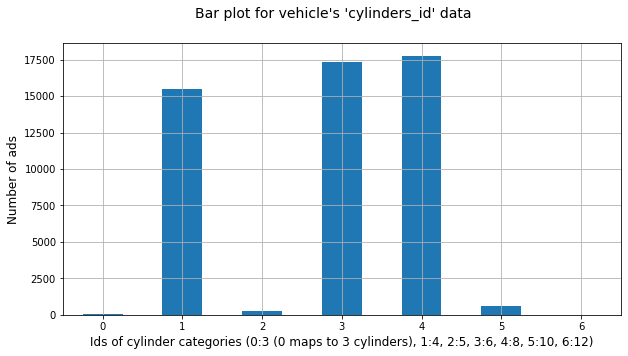

In [51]:
# Bar plot for 'cylinders_id' column
data_preproc['cylinders_id'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=0)
plt.suptitle("Bar plot for vehicle's 'cylinders_id' data", fontsize=14)
plt.xlabel('Ids of cylinder categories (0:3 (0 maps to 3 cylinders), 1:4, 2:5, 3:6, 4:8, 5:10, 6:12)', fontsize=12)
plt.ylabel('Number of ads', fontsize=12)
plt.grid()
plt.show()


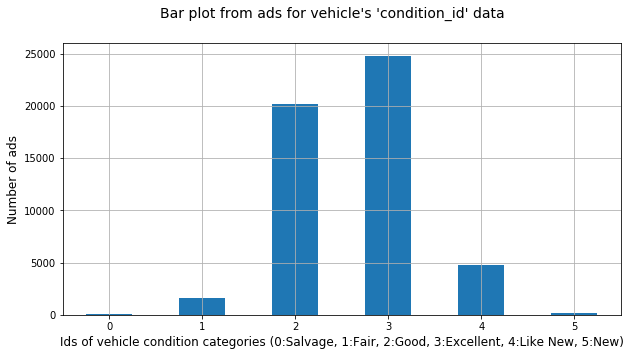

In [52]:
# Bar plot for 'condition_id' column
 
data_preproc['condition_id'].value_counts().sort_index().plot(kind='bar',  figsize=(10, 5))
plt.suptitle("Bar plot from ads for vehicle's 'condition_id' data", fontsize=14)
plt.xlabel('Ids of vehicle condition categories (0:Salvage, 1:Fair, 2:Good, 3:Excellent, 4:Like New, 5:New)',
           fontsize=12)
plt.ylabel('Number of ads', fontsize=12)
plt.xticks(rotation=0)
plt.grid()
plt.show()


For the categorical variables, the outlier concept does not apply unless the category is an anomaly. On the other hand, we can tell from the bar plots that the shorter the heights of the bars, the less number of ads we have for the corresponding categories, making them less popular. Here are our findings: 
- Cylinder ids $1$, $3$, $6$, $7$ corresponding to $3$, $5$, $10$, and $12$ cylinders, respectively, are seen rarely in the ads. This is not surprising given that most vehicles on the market have $4$, $6$, and $8$ cylinder engines. 
- Condition ids $0$ and $5$, which correspond to vehicles in 'salvage' and 'new' conditions, are also found rarely in the ads. This lookes reasonable. Interestingly, half of the ad owners advertised their vehicles as 'excellent' in condition.

For each quantitative variable, we plotted three graphs side by side. While the first graph shows the full histogram, the other two show histograms for different x-axis ranges. Despite we can't see blue bars for the outliers on the first histograms, we can tell that there are large valued outliers in all three cases. This is because it is obvious from the full histograms that the outliers on the far right cause the main body of the histograms to appear on the left halves of the figures. The right halves look empty, but this means that there aren't too many outliers on the far right so as to be seen visually when compared to the height of the dominate bars of the histograms. We plotted the second and third histograms by limiting the x-axis ranges to upper limits to improve readability. Let us present our findings based on these zoomed histograms:
- We see that the 'price' data peaks somewhere around $5000$ ($\pm 2000$), which could be reasonable for the US market. Also, we see that there is a trend of pricing in multiples of $1000$ (indicated by the higher spikes at these points) on the site. However, we observe a suspicious peak around $0$ for about $900$ ads and also multiple values less than $1000$. These perhaphs correspond to vehicles in 'salvage' codition, but could as well point out to anomalies caused for instance by scammers or those ad owners who do not want to advertise prices publicly.
- For the 'model_age' data, we observe a group of peaks around $4$ to $7$ years old vehicle models. We also observe the value $0$. These entries could correspond to new vehicle ads, but could also be the indication of some anomalies in data
- Finally, we see that the 'odometer' data peaks around $100,000$ miles. There is also a peak around $0$ for slightly more than $800$ entries. As in the previous case, we should check if these entries belong to new vehicles or not.

Before moving to the next point, let us check about the potentially suspicious data.

In [53]:
print("Number of vehicles advertised as 'new' in condition:", 
      data_preproc['condition_id'].value_counts().sort_index().iloc[-1])
print("Number of vehicles advertised as 'like new' in condition:", 
      data_preproc['condition_id'].value_counts().sort_index().iloc[-2])
print("Number of vehicles advertised as 0 'model_age':", 
      len(data_preproc.loc[data_preproc['model_age'] == 0]))
print("Number of vehicles advertised as 1 'model_age':", 
      len(data_preproc.loc[data_preproc['model_age'] == 1]))

Number of vehicles advertised as 'new' in condition: 143
Number of vehicles advertised as 'like new' in condition: 4742
Number of vehicles advertised as 0 'model_age': 2216
Number of vehicles advertised as 1 'model_age': 2267


The above numbers seems consistent. However, there were about $900$ ads for which the mileage is less than 600 miles. Where could account for the difference (900-143)? Rather than anomalies in data, it could be that the perception of ad owners about their vehicles vary. Or, perhaps, very low mileage vehicles that were advertised as 'like new' in condition, rather than 'new', were involved in accidents and needed repair. Let us also check few more numbers.

In [54]:
print('Number of ads with price less than 1000 for vehicles in salvage condition:',
      (data_preproc.loc[data_preproc['price'] < 1000, 'condition_id'] == 0).sum())
print('Number of ads with odometer value less than 15000 for vehicles in new or like new condition:',
      (data_preproc.loc[data_preproc['odometer'] < 15000, 'condition_id'] >= 5).sum())
print("Number of vehicles advertised as 'good' in condition:", 
      data_preproc['condition_id'].value_counts().sort_index().iloc[-4])
print("Number of vehicles advertised as 'excellent' in condition:", 
      data_preproc['condition_id'].value_counts().sort_index().iloc[-3])
print("Number of vehicles advertised as 'salvage' in condition:", 
      data_preproc['condition_id'].value_counts().sort_index().iloc[-5])


Number of ads with price less than 1000 for vehicles in salvage condition: 28
Number of ads with odometer value less than 15000 for vehicles in new or like new condition: 86
Number of vehicles advertised as 'good' in condition: 20145
Number of vehicles advertised as 'excellent' in condition: 24773
Number of vehicles advertised as 'salvage' in condition: 1607


Now, we found that among the $1607$ vehicles in 'salvage' condition, only $28$ were advertised with a price less than $1000$. So, the vehicle in salvage condition alone do not account for the peak we saw around $0$ in the price histogram. We also see that, although there were $143$ ads for vehicles advertised as 'new', only $86$ of them indicated miliage of less than $15000$ miles. So, could we have generated the values for the remaining few during data preprocessing, or the content of these ads are not very consistent? 

2. Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.

We first determine the lower and upper whiskers of the quantitative data in the 'price', 'model_age', 'odometer' columns. Data points that fall outside the whiskers are considered as outliers.

In [55]:
# Determine limits of outliers for 'price', 'model_age', and 'odometer' columns

LB_outliers = [] 
UB_outliers = []
for col in ['price', 'model_age', 'odometer']:
    Q1 = data_preproc[col].quantile(0.25)  # Get first quartile
    Q3 = data_preproc[col].quantile(0.75)  # Get third quartile
    IQR = Q3 - Q1  # Interquartile range
    LB_outliers.append(Q1 - 1.5*IQR)   # Compute lower whisker 
    UB_outliers.append(Q3 + 1.5*IQR)   # Compute upper whisker
    # print the information
    printmd("'{}' column:".format(col), color = 'blue')
    print("Outliers fall outside the range of [{}, {}].".format(Q1 - 1.5*IQR, Q3 + 1.5*IQR))
    print("Minimum and maximum values are {} and {}."
          .format(data_preproc[col].min(), data_preproc[col].max()))
    print()


<span style='color:blue'>'price' column:</span>

Outliers fall outside the range of [-12758.5, 34597.5].
Minimum and maximum values are 1 and 375000.



<span style='color:blue'>'model_age' column:</span>

Outliers fall outside the range of [-8.0, 24.0].
Minimum and maximum values are 0 and 111.



<span style='color:blue'>'odometer' column:</span>

Outliers fall outside the range of [-46022.0, 271370.0].
Minimum and maximum values are 0 and 990000.



Next, we filter out the outliers for each column and store them separately.

In [56]:
# Filter outliers and store them separately

data_P = data_preproc.query('price < @UB_outliers[0]')
data_P_outliers = data_preproc.query('price >= @UB_outliers[0]')

data_MA = data_preproc.query('model_age < @UB_outliers[1]')
data_MA_outliers = data_preproc.query('model_age >= @UB_outliers[1]')

data_O = data_preproc.query('odometer < @UB_outliers[2]')
data_O_outliers = data_preproc.query('odometer >= @UB_outliers[2]')


3. Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.


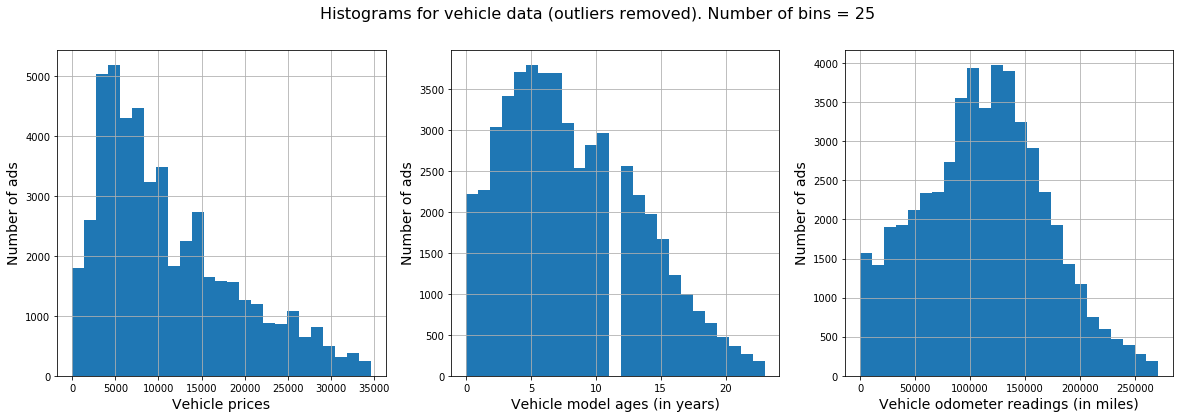

In [57]:
# Plot histograms for 'price', 'model_age', and 'odometer' columns without outliers

fig, axes = plt.subplots(1, 3, figsize=(20,6))

data_P['price'].hist(bins=25, ax=axes[0])  
axes[0].set_xlabel('Vehicle prices',  fontsize=14)
axes[0].set_ylabel('Number of ads', fontsize=14)

data_MA['model_age'].hist(bins=25, ax=axes[1])
axes[1].set_xlabel('Vehicle model ages (in years)', fontsize=14)
axes[1].set_ylabel('Number of ads', fontsize=14)

data_O['odometer'].hist(bins=25, ax=axes[2])
axes[2].set_xlabel('Vehicle odometer readings (in miles)', fontsize=14)
axes[2].set_ylabel('Number of ads', fontsize=14)


plt.suptitle("Histograms for vehicle data (outliers removed). Number of bins = 25", fontsize=16)
plt.show()


The histograms we plotted after filtering out the outliers are much more readable. We could already tell that the distributions of price, model age, and odometer data are right skewed and have large spreads from the histograms we plotted before removing the outliers. However, it was difficult to distinguish the centers (we had to zoom in limiting the x-axis range) or the modes, or the shapes of the distributions. After removing the outliers, we can see that the typical price distribution is more right skewed compared to the model age and odometer distributions. The odometer histogram is more centered, and both model age's and odometer's distributions right tails are decaying rather smoothly reminding us of the shape of the Gaussian distribution. We observe in all three histograms two modes. For price happening around $5000$ and $15000$, for model age around $5$ and $10$ years, and for odometer around $100,000$ and $125,000$ miles. Of course, we make these observations on histograms and not on density plots, so we have to interpret based on a pile of rectangles rather than a continuous density. Pandas offer the possibility to plot density estimetes via Kernel Density Estimator, which could also be worth exploring. 

4. Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.


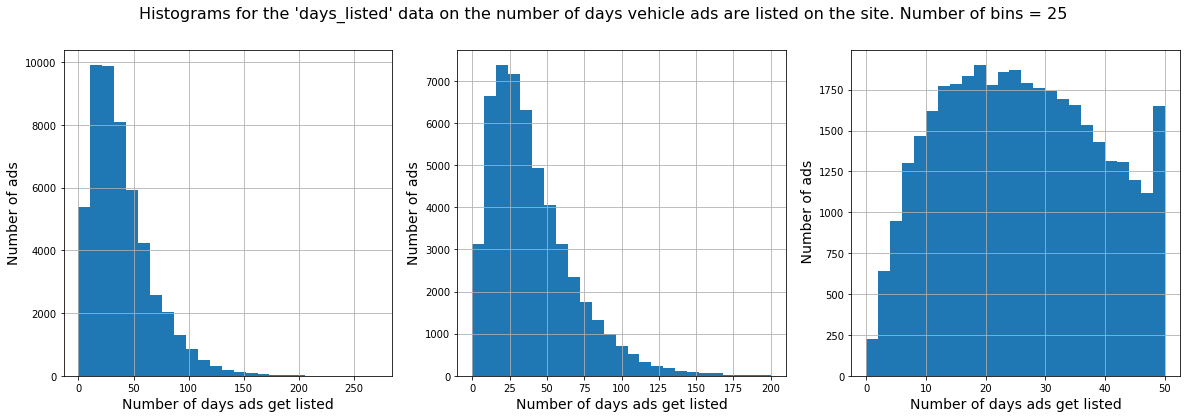

In [58]:
# Plot histograms for 'days_listed' column

fig, axes = plt.subplots(1, 3, figsize=(20,6))

data_preproc['days_listed'].hist(bins=25, ax=axes[0])
axes[0].set_xlabel('Number of days ads get listed',  fontsize=14)
axes[0].set_ylabel('Number of ads', fontsize=14)
data_preproc['days_listed'].hist(bins=25, ax=axes[1], range=(0, 200)) # Limit x-axis range to given interval
axes[1].set_xlabel('Number of days ads get listed',  fontsize=14)
axes[1].set_ylabel('Number of ads', fontsize=14)
data_preproc['days_listed'].hist(bins=25, ax=axes[2], range=(0, 50))  # Limit x-axis range to given interval
axes[2].set_xlabel('Number of days ads get listed',  fontsize=14)
axes[2].set_ylabel(' Number of ads', fontsize=14)
plt.suptitle("Histograms for the 'days_listed' data on the number of days vehicle ads are listed on the site."
             " Number of bins = 25", fontsize=16)
plt.subplots_adjust(hspace = 0.4)
plt.show()


In [59]:
# Calculate mean and median of the number of days ads were listed
DL_stats = data_preproc['days_listed'].describe()
DL_mean = DL_stats['mean']
DL_median = DL_stats['50%']
# Show summary statistics of 'days_listed' column
display(DL_stats)

# Compute lower and upper whiskers
Q1 = DL_stats['25%']
Q3 = DL_stats['75%']
IQR = Q3 - Q1
why_l = int(Q1 - 1.5*IQR)
why_u = int(Q3 + 1.5*IQR)

# Print information
printmd("'days_listed' column:", color = 'blue')
print("Outliers fall outside the range of [{}, {}].".format(why_l, why_u))
print("Minimum and maximum values are {} and {}.".format(int(DL_stats['min']), int(DL_stats['max'])))

# Compute and display percentage of ads listed more than the upper whisker
cond_long = (data_preproc['days_listed'] > why_u )
print("Number of ads listed more than $104$ days:", cond_long.sum())
print("Percentage of ads listed more than {} days: {:.2%}".format(why_u , cond_long.sum()/DL_stats['count']))


count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

<span style='color:blue'>'days_listed' column:</span>

Outliers fall outside the range of [-32, 104].
Minimum and maximum values are 0 and 271.
Number of ads listed more than $104$ days: 1618
Percentage of ads listed more than 104 days: 3.14%


From the summary statistics, we can see that the data have some large outliers pushing the mean about $10$ days more than the median. The *average* ad was listed slightly more than a month ($33$ days). The typical lifetime of ads, falling $1.5$ IQR above the third quartile, is $104$ days. So, outlier ads are those listed for about more than $3.5$ months. There are $1618$ ads listed for more than $104$ days, which corresponds to $3.14\%$ of the ads. Now, let us move to ads which were removed very quickly. The statistical classification of outliers does not apply here, since the lower whisker we computed is negative valued. An add will be removed from the site when either the vehicle is sold (via the site or channels) or when the ad owner decides to not use the site's services anymore for various reasons (do not want to sell anymore, found other channels, disappointed with the service, having trouble using the interface, etc., etc.). So, let us look at the number of ads removed within $10$ days. 

In [60]:
# Quickly removed ads
cond_quick = (data_preproc['days_listed'] < 10)
display(data_preproc.loc[cond_quick, 'days_listed'].describe())


count    4586.000000
mean        5.913650
std         2.396098
min         0.000000
25%         4.000000
50%         6.000000
75%         8.000000
max         9.000000
Name: days_listed, dtype: float64

We found that there were slightly more than $4500$ ads removed within $10$ days. The count corresponds to about $8.9\%$ of the ads. Finally, let us also add a boxplot to visualize the outliers we have discussed.

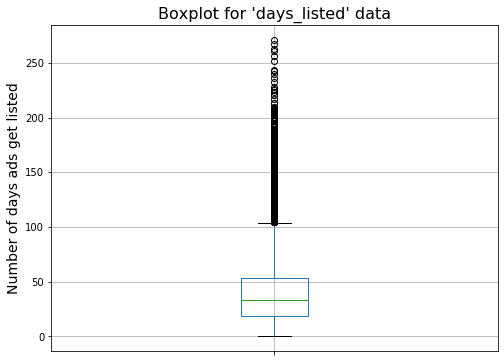

In [61]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
data_preproc.boxplot(column='days_listed', ax=axes)
axes.set_title("Boxplot for 'days_listed' data", fontsize=16)
axes.set_ylabel('Number of days ads get listed', fontsize=14)
axes.set_xticklabels('')
plt.show()

5. Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.


In [62]:
# Pivot table for the number of ads and the average price for each type of vehicle
pivot_type_id = data_preproc.pivot_table(index='type_id' , values='price', aggfunc=['count', 'mean'])
pivot_type_id.columns = ['Number of ads', 'Av. price']
pivot_type_id['Type'] = type_dict.values()
pivot_type_id = pivot_type_id.sort_values(by='Number of ads', ascending=False)

display(pivot_type_id)


,Number of ads,Av. price,Type
type_id,,,
0,12405,11149.400000,SUV
3,12353,16734.894924,truck
2,12154,6965.358647,sedan
1,6988,16057.410418,pickup
4,2303,14353.442901,coupe
8,1541,9088.134328,wagon
9,1161,8193.177433,mini-van
7,1047,6868.513849,hatchback
5,633,10546.941548,van


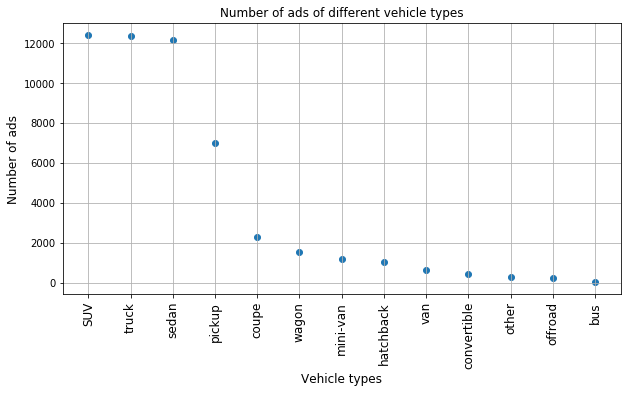

The two types with the greatest number of ads are SUVs and trucks
Number of ads for SUVs: 12405
Number of ads for trucks: 12353


In [63]:
# Plot a graph showing the dependence of the number of ads on the vehicle type.
plt.figure(figsize=(10,5))
plt.scatter(x=pivot_type_id['Type'], y=pivot_type_id['Number of ads'])
plt.xticks(fontsize=12, rotation=90)
plt.title('Number of ads of different vehicle types', fontsize=12)
plt.xlabel('Vehicle types', fontsize=12)
plt.ylabel('Number of ads', fontsize=12)
plt.grid()
plt.show()

# Select the two types with the greatest number of ads.
print('The two types with the greatest number of ads are {}s and {}s'.format(
    pivot_type_id['Type'].iloc[0], pivot_type_id['Type'].iloc[1]))
print('Number of ads for {}s: {}'.format(pivot_type_id['Type'].iloc[0], pivot_type_id['Number of ads'].iloc[0]))
print('Number of ads for {}s: {}'.format(pivot_type_id['Type'].iloc[1], pivot_type_id['Number of ads'].iloc[1]))


We found out that SUVs, trucks, and sedan automobiles are almost equally popular. Each appears in about $23\%$ of the ads. Pickups follow these in popularity, with about half as many ads.  

6. What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.


In the previous task, we have identified that SUVs and trucks are the most sought after vehicle types on the site. Each type had more than $12000$ ad listings. Let now investigate how the listed factors affect the price for these types of vehicles. We start with the categorical variables.

In [64]:
# Plot box-and-whisker charts for categorical variables (condition, transmission type and color) 

# Filter data for SUVs and trucks
data_SUV = data_preproc.query('type_id == 0').copy()
data_truck = data_preproc.query('type_id == 3').copy()

# Display value counts to see category ids with less than 50 entries
print('Value counts for SUVs')
print(data_SUV['condition_id'].value_counts())
print(condition_dict_new)
print(data_SUV['transmission_id'].value_counts())
print(transmission_dict)
print(data_SUV['paint_color_id'].value_counts())
print()
print('Value counts for trucks')
print(data_truck['condition_id'].value_counts())
print(condition_dict_new)
print(data_truck['transmission_id'].value_counts())
print(transmission_dict)
print(data_truck['paint_color_id'].value_counts())
print(paint_color_dict)

# Filter out categories with less than 50 ads
for col in ['condition_id', 'transmission_id', 'paint_color_id']:
    for i in range(len(data_preproc[col].unique())): 
        # For SUVs
        if (data_SUV[col] == i).sum() < 50:    # When id is observerd less than 50 times
            indexes_SUV = data_SUV.loc[data_SUV[col] == i].index      # Find indexes
            data_SUV.drop(indexes_SUV, inplace=True)       # Remove category from dataframe
        # Repeat for trucks
        if (data_truck[col] == i).sum() < 50:
            indexes_truck = data_truck.loc[data_truck[col] == i].index
            data_truck.drop(indexes_truck, inplace=True)
            

Value counts for SUVs
3    6560
2    4316
4    1157
1     333
0      20
5      19
Name: condition_id, dtype: int64
{0: 'salvage', 1: 'fair', 2: 'good', 3: 'excellent', 4: 'like new', 5: 'new'}
0    11735
1      510
2      160
Name: transmission_id, dtype: int64
{0: 'automatic', 1: 'manual', 2: 'other'}
0     2236
3     2220
1     1962
6     1558
5     1183
4     1055
2      906
11     436
10     369
7      308
8       84
9       49
12      39
Name: paint_color_id, dtype: int64

Value counts for trucks
3    5507
2    5313
4    1069
1     407
5      45
0      12
Name: condition_id, dtype: int64
{0: 'salvage', 1: 'fair', 2: 'good', 3: 'excellent', 4: 'like new', 5: 'new'}
0    11703
1      444
2      206
Name: transmission_id, dtype: int64
{0: 'automatic', 1: 'manual', 2: 'other'}
1     3737
0     2135
3     1581
2     1061
6     1020
5      960
4      881
7      316
11     278
10     253
9       67
8       48
12      16
Name: paint_color_id, dtype: int64
{0: 'Unknown', 1: 'white', 2: 're

In [65]:
# Print ids of unique entries after removal
for col in ['condition_id', 'transmission_id', 'paint_color_id']:
    print("SUV category ids remaning in {} column: {}".format(col, data_SUV[col].unique()))
    print("Truck category ids remaning in {} column {}:".format(col, data_truck[col].unique()))


SUV category ids remaning in condition_id column: [2 3 4 1]
Truck category ids remaning in condition_id column [4 2 3 1]:
SUV category ids remaning in transmission_id column: [0 1 2]
Truck category ids remaning in transmission_id column [0 1 2]:
SUV category ids remaning in paint_color_id column: [ 0  3  4  2  1  6  5 11 10  8  7]
Truck category ids remaning in paint_color_id column [ 2  3  7  5  1  6  0 10  4 11  9]:


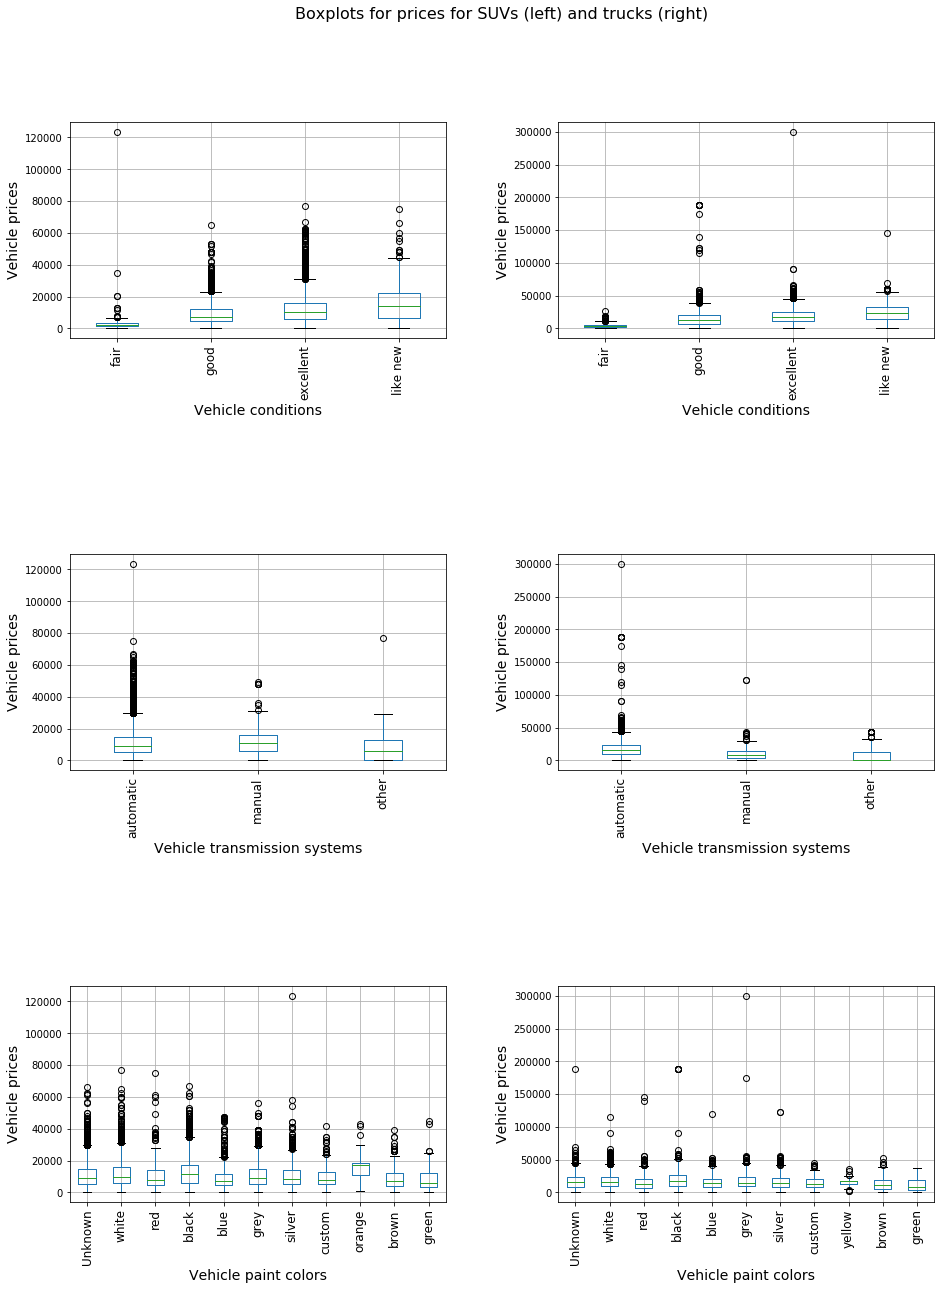

In [66]:
# Plot boxplots (con't)
fig, axes = plt.subplots(3, 2, figsize=(15,20))

data_SUV.boxplot(column='price', by='condition_id', ax=axes[0, 0])
axes[0, 0].set_xticklabels([condition_dict_new.get(key) for key in sorted(data_SUV['condition_id'].unique())], 
                           fontsize= 12, rotation=90)
axes[0, 0].set_title("")
axes[0, 0].set_ylabel("Vehicle prices", fontsize= 14)
axes[0, 0].set_xlabel("Vehicle conditions",  fontsize= 14)

data_SUV.boxplot(column='price', by='transmission_id', ax=axes[1, 0])
axes[1, 0].set_xticklabels([transmission_dict.get(key) for key in sorted(data_SUV['transmission_id'].unique())], 
                           fontsize= 12, rotation=90)
axes[1, 0].set_title("")
axes[1, 0].set_ylabel("Vehicle prices", fontsize= 14)
axes[1, 0].set_xlabel("Vehicle transmission systems",  fontsize= 14)

data_SUV.boxplot(column='price', by='paint_color_id', ax=axes[2, 0])
axes[2, 0].set_xticklabels([paint_color_dict.get(key) for key in sorted(data_SUV['paint_color_id'].unique())], 
                           fontsize= 12, rotation=90)
axes[2, 0].set_title("")
axes[2, 0].set_ylabel("Vehicle prices", fontsize= 14)
axes[2, 0].set_xlabel("Vehicle paint colors",  fontsize= 14)

data_truck.boxplot(column='price', by='condition_id', ax=axes[0, 1])
axes[0, 1].set_xticklabels([condition_dict_new.get(key) for key in sorted(data_truck['condition_id'].unique())], 
                           fontsize= 12, rotation=90)
axes[0, 1].set_title("")
axes[0, 1].set_ylabel("Vehicle prices", fontsize= 14)
axes[0, 1].set_xlabel("Vehicle conditions",  fontsize= 14)

data_truck.boxplot(column='price', by='transmission_id', ax=axes[1, 1])
axes[1, 1].set_xticklabels([transmission_dict.get(key) for key in sorted(data_truck['transmission_id'].unique())], 
                           fontsize= 12, rotation=90)
axes[1, 1].set_title("")
axes[1, 1].set_ylabel("Vehicle prices", fontsize= 14)
axes[1, 1].set_xlabel("Vehicle transmission systems",  fontsize= 14)

data_truck.boxplot(column='price', by='paint_color_id', ax=axes[2, 1])
axes[2, 1].set_xticklabels([paint_color_dict.get(key) for key in sorted(data_truck['paint_color_id'].unique())], 
                           fontsize= 12, rotation=90)
axes[2, 1].set_title("")
axes[2, 1].set_ylabel("Vehicle prices", fontsize= 14)
axes[2, 1].set_xlabel("Vehicle paint colors",  fontsize= 14)

# Adjust spacing between the subplots
plt.subplots_adjust(hspace = 1, wspace=0.3)
# Add title from the Boxplots
plt.suptitle('Boxplots for prices for SUVs (left) and trucks (right)', fontsize= 16)
# Display the plots
plt.show()


Let us interpret the boxplots:
- For both SUVs and trucks, we observe that the median price is increasing as the condition of the vehicle improves. However the median values for the vehicles in good condition and those in excellent condition are relatively closer. Furthermore, we observe that there are quite some overlaps in the interquartile ranges. The latters are in fact getting larger and larger as the condition of the vehicle improves for both types of vehicles, but especially for SUVs. Thus, an SUV in good condition might be more expensive than another one in excellent condition. It is therefore clear that other factors are at play. Finally, we can observe that both types have outliers in each category, but mostly those in good or excellent in condition. However, the majority of the price outliers in the latter two categories are closer to the upper whiskers for trucks, while many price outliers for SUVs might fall farther away than the typical price ranges of the two condition categories.
- We observe even less dependency of the prices of the vehicles to their transmission systems. For the typical interquartile ranges, some manual SUVs might be slightly more expensive than automatic SUVs, and both might might be more expensive than SUVs having other types of transmission systems. Similar observations can be made for trucks reversing the role of manual and automatic transmission systems in our previous comment. However, we know that more than $90\%$ of the ads consists of vehilce with automatic transmission systems, and in fact, a lot of outliers can be observed in this group. 
- As for the colors, we observe that the vehicle prices do not considerably depend on the specific colors, except for the orange color for SUVs whose interquartile range sits above the ranges of all the other colors. So, the boxplots fail to support our initial hypothesis that white or black colored vehicles would remain chepear as they age.

Next, we move to the quantitative variables.

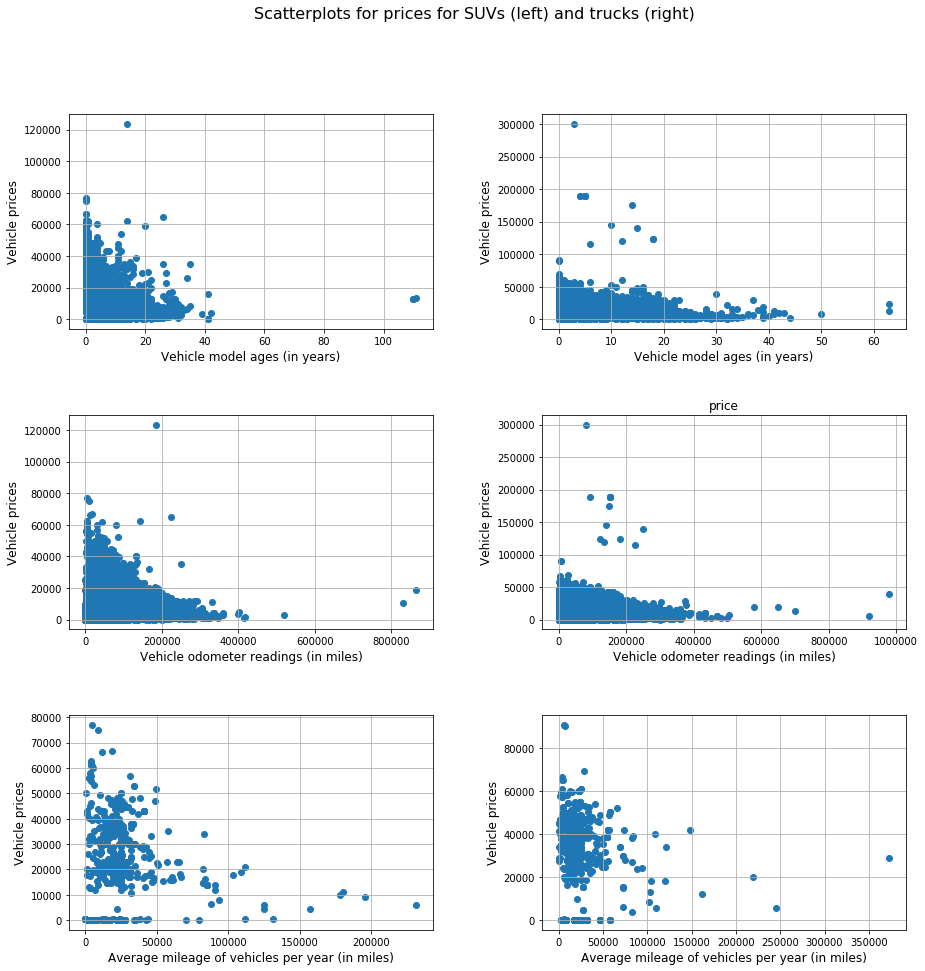

In [67]:
# Create scatterplots for the quantitative variables (age, mileage)
fig, axes = plt.subplots(3, 2, figsize=(15,15))
axes[0, 0].scatter(y= 'price', x='model_age',data=data_SUV)
axes[0, 0].grid()
axes[0, 0].set_xlabel('model age', fontsize=12)
axes[0, 0].set_xlabel('Vehicle model ages (in years)', fontsize=12)
axes[0, 0].set_ylabel('Vehicle prices', fontsize=12)

axes[0, 1].scatter(y= 'price', x='model_age',data=data_truck)
axes[0, 1].grid()
axes[0, 1].set_xlabel('model age', fontsize=12)
axes[0, 1].set_xlabel('Vehicle model ages (in years)', fontsize=12)
axes[0, 1].set_ylabel('Vehicle prices', fontsize=12)

axes[1, 0].scatter(y= 'price', x='odometer',data=data_SUV)
axes[1, 0].grid()
axes[1, 0].set_xlabel('Vehicle odometer readings (in miles)', fontsize=12)
axes[1, 0].set_ylabel('Vehicle prices', fontsize=12)

axes[1, 1].scatter(y= 'price', x='odometer',data=data_truck)
axes[1, 1].grid()
axes[1, 1].set_title('price', fontsize=12)
axes[1, 1].set_xlabel('Vehicle odometer readings (in miles)', fontsize=12)
axes[1, 1].set_ylabel('Vehicle prices', fontsize=12)

axes[2, 0].scatter(y= 'price', x='av_mileage_per_year',data=data_SUV)
axes[2, 0].grid()
axes[2, 0].set_xlabel('Average mileage of vehicles per year (in miles)', fontsize=12)
axes[2, 0].set_ylabel('Vehicle prices', fontsize=12)

axes[2, 1].scatter(y= 'price', x='av_mileage_per_year',data=data_truck)
axes[2, 1].grid()
axes[2, 1].set_xlabel('Average mileage of vehicles per year (in miles)', fontsize=12)
axes[2, 1].set_ylabel('Vehicle prices', fontsize=12)

# Adjust spacing between the subplots
plt.subplots_adjust(hspace= 0.4, wspace=0.3)
# Remove the title from the Boxplots
plt.suptitle('Scatterplots for prices for SUVs (left) and trucks (right)', fontsize=16)
# Display the plots
plt.show()


Let us interpret the above scatter plots:
- In the first two cases, scatter plots for model age and mileage, we can observe the points form triangular clusters on the left bottom corner of the figures. This means that as the model age and/or mileage of the vehicles increase, the maximum observed price decreases, reaching eventually $0$. Moreover, the slope of the decrease is much steeper for SUVs than for trucks. So, it seems that trucks preseve their values for much longer, while SUVs loose values much rapidly. 
- In the first two pairs of scatter plots we do not know where the data points in the model age figures get mapped in the mileage figures. From our observations, we might jump to the conclusion that since price decays with mileage and age, the price should decay with the average mileage per year. This, however, is not true for our dataset. In the third pair of scatter plots, we observe that the data points are less dense and concentrate on rectangular areas. Therefore, the price of the vehicles does not depend strongly on the average mileage per year.

Before moving to our concluding remarks for this section, let us also look at the correlation vector between the price and the other columns of our dataset to see if our graphical interpretations are in line with the Pearson's coefficients.

In [68]:
# Display correlation vector of preprocessed and manipluated data
display(data_preproc.corr().round(2).head(1).transpose())


,price
price,1.00
model_year,0.40
odometer,-0.42
is_4wd,0.32
days_listed,-0.00
model_id,0.06
condition_id,0.22
cylinders_id,0.31
fuel_id,0.17
transmission_id,0.06


We are glad to discover that the correlation coefficients do not contradict our graphical interpretations. From strongest to weakest, the factors negatively correlated with the price data: mileage and model age (medium), average mileage per year and paint color (weak). From strongest to weakest, the factors positively correlated with the price data: condition of the vehicle and transmission system (weak). To be more accurate, the strength of the correlations with the transmission system and paint color are so weak that we can consider the price to be *linearly* not dependent on these factors. This does not mean that we can conclude the random variable for the price of the vehicles and the ones for the stated factors to be independent. There could be more complex dependencies beyond linearity between the variables, and we would need to carry out a more in-depth analysis to identify their presences or abscences.

**Concluding remarks:** In this step, we explored some of the main characteristics of our dataset by using elementary statistical methods and data visualization tools. In particular, we relied on histograms and bar plots to study the distributions of some of our data columns. Outliers in the distributions were identified working with our best friend--summary statistics. We also studied the dependencies in the columns of our dataset either through boxplots for grouped data or scatter plots. For the latter cases, we also computed the Pearson's correlation to quantitavely measure the dependencies. We leave summarizing our findings to the next section.

### Step 5. Overall conclusion

In this report we analyzed Crankshaft Lists data on 51525 ads collected over a period of one year starting from May 2018. The data for each ad consisted of information about the vehicle such as model, year of model, type, color, and more technical properties, as well as data about when the ad was posted and how long it was listed. In total, 13 features were involved. Our goal was to help the company decide which factors influence most the price of the vehicles. 

Before attempting to draw conclusions from the data, we evaluated the quality of the raw data in Step1 and observed that the raw data is not ready for us to carry out an exploratory data analysis. From the general information about our dataset we identified several columns with missing values for quantitative or categorical variables. Among those were two columns containing important information about our study: the year of the vehicle model and odometer with about $7\%$ and $15\%$ missing data, respectively. In this step, we also identified data type issues. In particular, another crucial data column for our study, the data the ads were posted, was stored as strings and needed convertion to a datetime format for us to be able to extract useful information. 

In Step 2, we rolled up our sleeves to further explore the content of our dataset. We strategically dealt with missing values, transformed some of the data types, and mapped categorical data to numerical ids. 

Once the data prepreprocessing stage was completed, we proceeded with data manipulation in Step 3. We extracted data from some of the columns to compute two additional features for the vehicles. Those were the age and the average mileage per year of the vehicles.

We got ready to start the most exciting part of our project after we put added the additional features into our dataset. In the exploratory data analysis we carried out in Step 4, we estimated distributions and correlations in our data through histograms, boxplots, or scatter plots. Let us summarize the interesting findings from this step and point out potential avenues for further research: 
- We saw that there are a lot of details that one can study about the content of the ads. We observed outliers in the distributions of the price, age, and mileage data, as well as peaks around $0$. We quickly checked in which conditions these vehicles were to assess whether the content of the ads were consistent. It seemed that there could be some anomalies with the data around $0$. This led us to pose some important questions: How objective/subjective are the ad owners about their vehicles?  Interestingly, almost half of the vehicles were advertised as 'excellent' in condition. How consistent are their various choices. Investigating these questions might help the company understand better its ad data and users' behavior.
- Speaking of users' behavior, we found out that ads are listed typically less than $3,5$ months in the site. Only $3\%$ of the ads were listed for more than $3,5$ months on the site. We also observed that about $9\%$ of the ads were removed within $10$ days. We did not however investigate the circumstances which led to these quickly removed or abnormally long listed ads. An interesting next step could be to further analyze the content of the ads in these two extremes in an attempt to identify what factors influence the typical lifetime of ads. For example, quickly removed ads could be the announcer of good or bad news. Good news would be that our site provides a successful sales medium. This information can be  used in marketing our site to attract even more users. Bad news would be that many users are not happy about the site’s services and withdraw within $10$ days.
- While the typical lifetime of ads is an important business question for the company, understanding the markets dynamics is as important. Three types of vehicles were popular in the ads: SUVs, trucks, and sedan automobile, each appears in about a quarter of the ads. Pickups follow these in popularity, with about half as many ads. One can further investigate whether this finding reflects the popularity of these types of vehicles in the US market and consumer choices, or whether the site could be failing in attracting ads for the other types of vehicles. For example, there might be other channels (online or offline) catered to the sales of buses and targeted marketing strategies might be needed to attract more users in these areas.
- Coming back to SUVs and trucks, we identified that the mileage and age of the vehicle were the two factors most influencial in determining their prices. For the other factors we looked, while the condition and average mileage per year were less decisive, the prices turned out to be almost independent from the paint colors. It would be beneficial to check from a technical standpoint, whether the age or mileage might be overemphasized in determining the price.

To conlcude, our dataset seem to reflect in many aspects standard choices and market dynamics of the US vehicle industry, from color choices to number of cylinders, popular types, wheel drive preferences, or after how many years owners typically sell their vehicles. It also carry information about the equipment capabilities of the vehicles, seen for example from the unavailability of accurate mileage data in old cars. On the other hand, the exploratory analysis reveaved some unintuitive aspects from the data. The most suprising being the weak influence of the average mileage per year to the prices of the vehicles. From a technical standpoint, each vehicle has a certain life expectancy. Thus, in theory, the average mileage per year of a vehicle should also be important in determining its price. So, in practice, consumers may not be making the smartest purchase decisions!